# IWBDA SBOL data workshop

This workshop was created and presented by Gonzalo Vidal.

If you have any doubt or would like more information about related content, please contact me at gonzalo.vidalpena@colorado.edu

# Install all the necesary packages

In [1]:
!pip install sbol3 --quiet
!pip install sbol_utilities --quiet

Sometimes this installation show errors, but in most cases it doesn’t affect our code. Try running the next cell with imports.

# Import all the necesary packages and functions

In [2]:
import os
import sbol3
from sbol_utilities import component
from sbol_utilities.conversion import convert_from_genbank, convert3to2
import tytoi

/usr/local/lib/python3.10/dist-packages/sbol3/object.py:71: UserWarning: Using a default namespace. To set a namespace use set_namespace()
  warnings.warn('Using a default namespace.'


# pLac transcriptional unit SBOL design

Every SBOL design needs to be part of a Document, let's create one.

In [3]:
doc = sbol3.Document()
sbol3.set_namespace('https://github.com/Gonza10V')

Now lets create a SBOL Component for a Promoter, for this we need to:


1.   Get a DNA sequence string
2.   Create a Sequence object using the DNA sequence from 1
3.   Create a Component object using the Sequence from 2


## Create a promoter using pySBOL3

Let's build a Promoter using vanilla pySBOL3

For this we need to create Sequence and Component objects.



Sequence obtained from:

https://synbiohub.org/public/igem/BBa_R0010/1

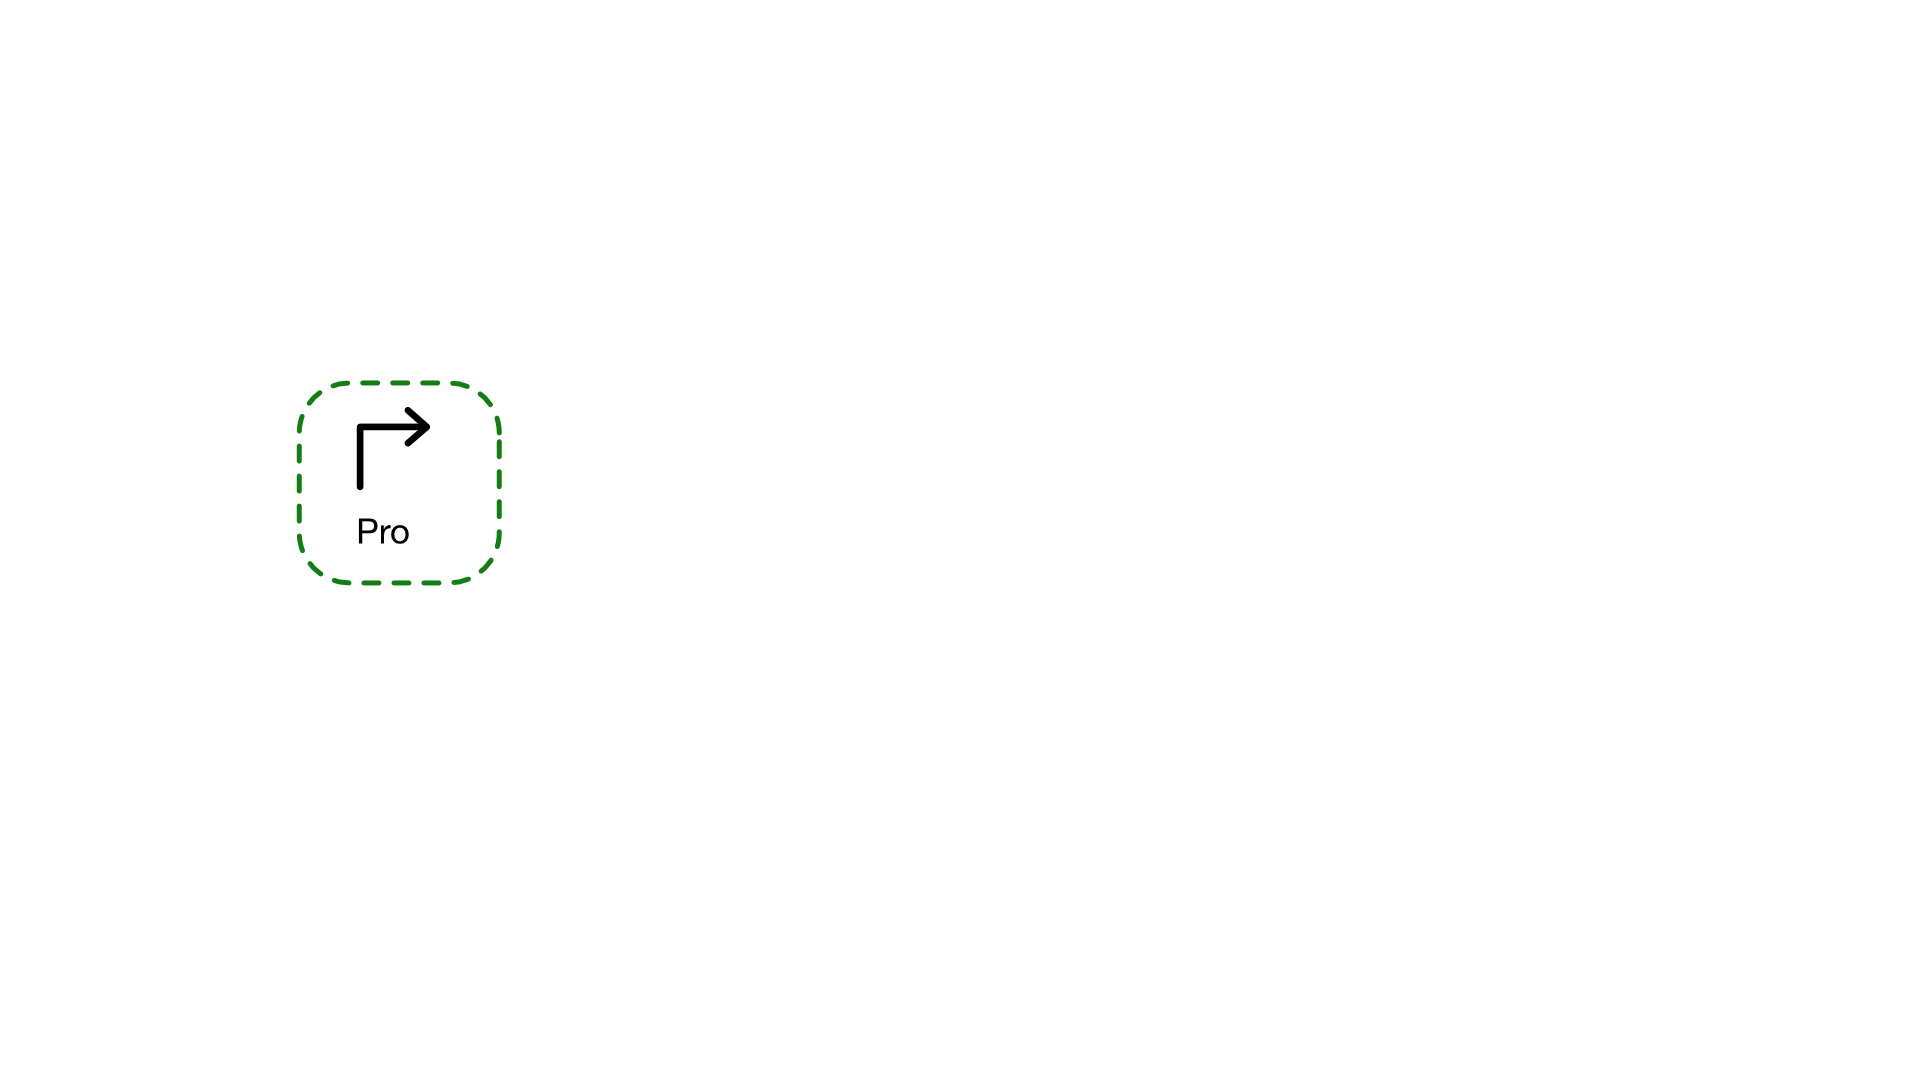

In [4]:
# Get sequence string from SynBioHub
pLac_str ='caatacgcaaaccgcctctccccgcgcgttggccgattcattaatgcagctggcacgacaggtttcccgactggaaagcgggcagtgagcgcaacgcaattaatgtgagttagctcactcattaggcaccccaggctttacactttatgcttccggctcgtatgttgtgtggaattgtgagcggataacaatttcacaca'

# Create Sequence object
pLac_seq = sbol3.Sequence(identity='pLac_seq', elements=pLac_str, encoding=sbol3.IUPAC_DNA_ENCODING)

# Create the Component object
pLac = sbol3.Component(identity='pLac', types=sbol3.SBO_DNA, roles=sbol3.SBO_PROMOTER, sequences=[pLac_seq])


Now lets use sbol-utilities to simplify the creation of SBOL objects

## Create an RBS, CDS and Terminator using sbol-utilities

Sequences obtained from:

https://synbiohub.org/public/igem/BBa_B0034/1

https://synbiohub.org/public/igem/BBa_C0040/1

https://synbiohub.org/public/igem/BBa_B0015/1

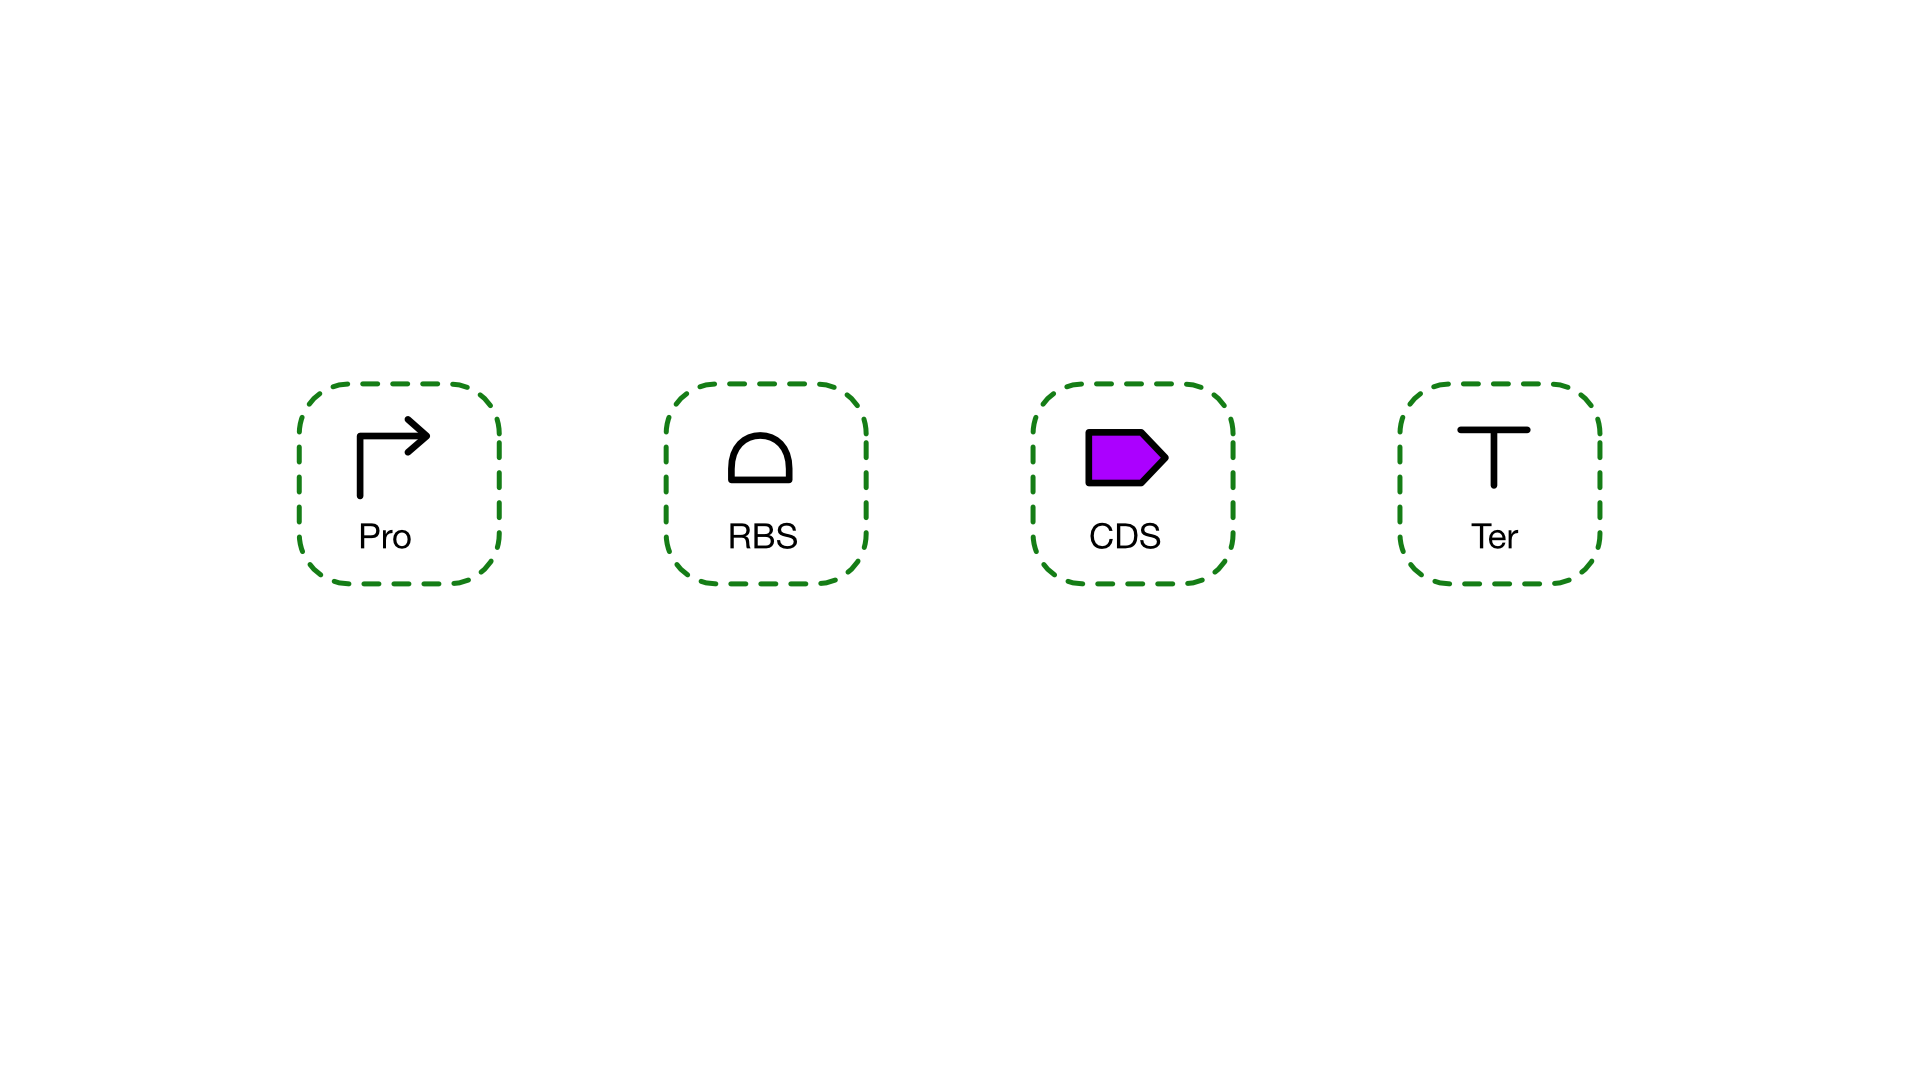

In [5]:
rbs_str = 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAatcacacaggacta'
tetR_str = 'GTCCatggtgaatgtgaaaccagtaacgttatacgatgtcgcagagtatgccggtgtctcttatcagaccgtttcccgcgtggtgaaccaggccagccacgtttctgcgaaaacgcgggaaaaagtggaagcggcgatggcggagctgaattacattcccaaccgcgtggcacaacaactggcgggcaaacagtcgttgctgattggcgttgccacctccagtctggccctgcacgcgccgtcgcaaattgtcgcggcgattaaatctcgcgccgatcaactgggtgccagcgtggtggtgtcgatggtagaacgaagcggcgtcgaagcctgtaaagcggcggtgcacaatcttctcgcgcaacgcgtcagtgggctgatcattaactatccgctggatgaccaggatgccattgctgtggaagctgcctgcactaatgttccggcgttatttcttgatgtctctgaccagacacccatcaacagtattattttctcccatgaagacggtacgcgactgggcgtggagcatctggtcgcattgggtcaccagcaaatcgcgctgttagcgggcccattaagttctgtctcggcgcgtctgcgtctggctggctggcataaatatctcactcgcaatcaaattcagccgatagcggaacgggaaggcgactggagtgccatgtccggttttcaacaaaccatgcaaatgctgaatgagggcatcgttcccactgcgatgctggttgccaacgatcagatggcgctgggcgcaatgcgcgccattaccgagtccgggctgcgcgttggtgcggatatctcggtagtgggatacgacgataccgaagacagctcatgttatatcccgccgttaaccaccatcaaacaggattttcgcctgctggggcaaaccagcgtggaccgcttgctgcaactctctcagggccaggcggtgaagggcaatcagctgttgcccgtctcactggtgaaaagaaaaaccaccctggcgcccaatacgcaaaccgcctctccccgcgcgttggccgattcattaatgcagctggcacgacaggtttcccgactggaaagcgggcagGGCTCG'
ter_str = 'GTCCatttgtcctactcaggagagcgttcaccgacaaacaacagataaaacgaaaggcccagtctttcgactgagcctttcgttttatttgTAAGGCTCG'

In [6]:
rbs1, rbs1_seq = component.rbs('B0034', rbs_str, description='RBS (Elowitz 1999) -- defines RBS efficiency')
tetR, tetR_seq = component.cds('tetR', tetR_str, description='Coding region for the TetR proteinwith degradation tag')
ter1, ter1_seq = component.terminator('B0015', ter_str, description='Double terminator consisting of BBa_B0010 and BBa_B0012')

This was way easier!

## Use the Promoter, RBS, CDS and Terminator to create a Transcriptional Unit

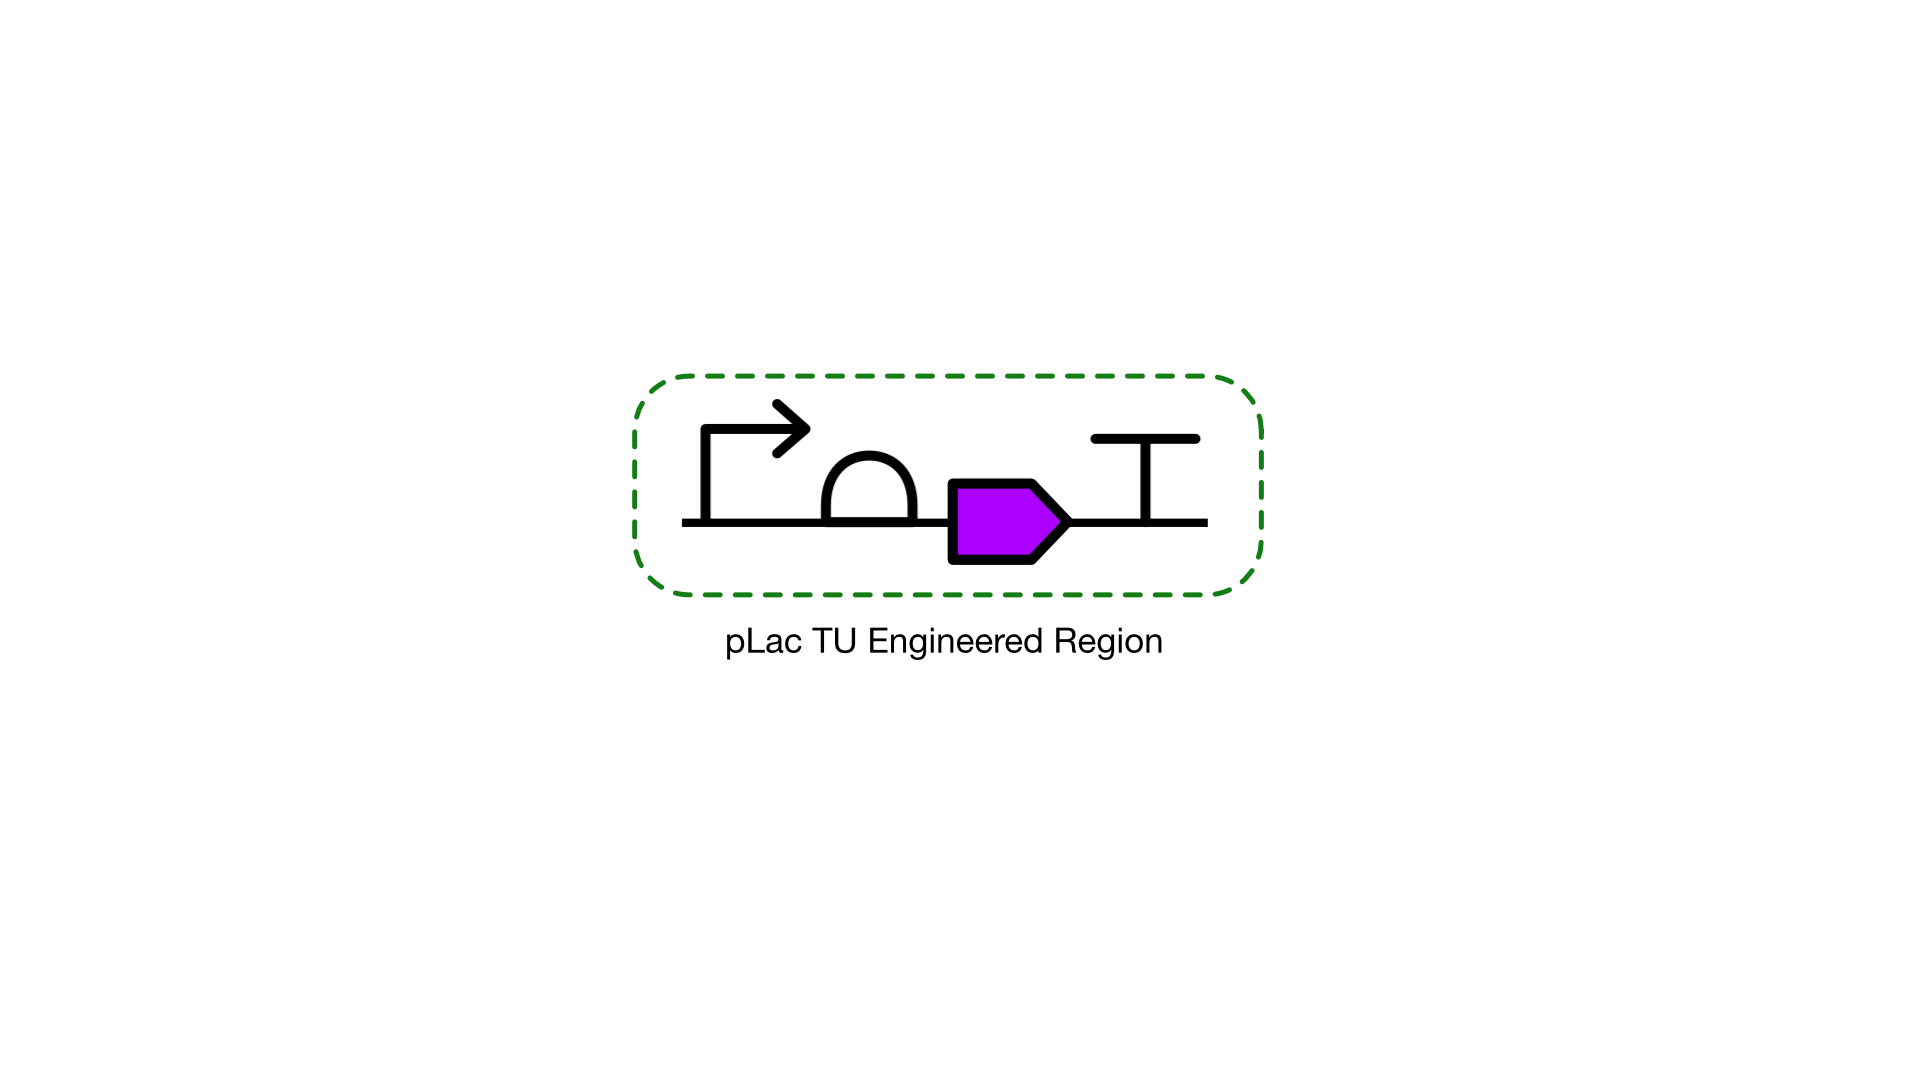

In [7]:
toggle_tu_pLac = component.engineered_region('pLac_tu', [pLac, rbs1, tetR, ter1], description='Transcriptional unit composed of pLac, B0034, tetR and B0015, thus LacI repressible expression and produces TetR.')

doc.add([pLac, pLac_seq, rbs1, rbs1_seq, tetR, tetR_seq, ter1, ter1_seq, toggle_tu_pLac])

# pTet transcriptional unit SBOL design

Obtain all the sequences needed for this design.

Parts obtained from:

https://synbiohub.org/public/igem/BBa_R0040/1

https://synbiohub.org/public/Eco1C1G1T1/BBa_B0064_rbs/1

https://synbiohub.org/public/Eco1C1G1T1/LacI_protein/1

https://synbiohub.org/public/igem/BBa_M36204/1



https://synbiohub.org/public/Eco1C1G1T1/L3S2P21_terminator/1

In [8]:
pTet_str = 'tccctatcagtgatagagattgacatccctatcagtgatagagatactgagcac'
rbs2_str = 'AAAGAGGGGAAA'
lacI_str = 'atggtgaatgtgaaaccagtaacgttatacgatgtcgcagagtatgccggtgtctcttatcagaccgtttcccgcgtggtgaaccaggccagccacgtttctgcgaaaacgcgggaaaaagtggaagcggcgatggcggagctgaattacattcccaaccgcgtggcacaacaactggcgggcaaacagtcgttgctgattggcgttgccacctccagtctggccctgcacgcgccgtcgcaaattgtcgcggcgattaaatctcgcgccgatcaactgggtgccagcgtggtggtgtcgatggtagaacgaagcggcgtcgaagcctgtaaagcggcggtgcacaatcttctcgcgcaacgcgtcagtgggctgatcattaactatccgctggatgaccaggatgccattgctgtggaagctgcctgcactaatgttccggcgttatttcttgatgtctctgaccagacacccatcaacagtattattttctcccatgaagacggtacgcgactgggcgtggagcatctggtcgcattgggtcaccagcaaatcgcgctgttagcgggcccattaagttctgtctcggcgcgtctgcgtctggctggctggcataaatatctcactcgcaatcaaattcagccgatagcggaacgggaaggcgactggagtgccatgtccggttttcaacaaaccatgcaaatgctgaatgagggcatcgttcccactgcgatgctggttgccaacgatcagatggcgctgggcgcaatgcgcgccattaccgagtccgggctgcgcgttggtgcggatatctcggtagtgggatacgacgataccgaagacagctcatgttatatcccgccgttaaccaccatcaaacaggattttcgcctgctggggcaaaccagcgtggaccgcttgctgcaactctctcagggccaggcggtgaagggcaatcagctgttgcccgtctcactggtgaaaagaaaaaccaccctggcgcccaatacgcaaaccgcctctccccgcgcgttggccgattcattaatgcagctggcacgacaggtttcccgactggaaagcgggcaggctgcaaacgacgaaaactacgctttagtagcttaataactctgatagtgctagtgtagatctc'
rbs3_str = 'gggcccaagttcacttaaaaaggagatcaacaatgaaagcaattttcgtactgaaacatcttaatcatgcggtggagggtttcta'
gfp_str = 'atggcatccaagggcgaggagctctttactggcgtagtaccaattctcgtagagctcgatggcgatgtaaatggccataagttttccgtacgcggcgagggcgagggcgatgcaactaacggcaagctcactctcaagtttatttgtactactggcaagctcccagtaccatggccaactctcgtaactactctgacctatggcgtacaatgtttttcccgctatccagatcacatgaagcaacatgatttttttaagtccgcaatgccagagggctatgtacaagagcgcactattagctttaaggatgatggcacctataagactcgcgcagaggtaaagtttgagggcgatactctcgtaaatcgcattgagctcaagggcattgattttaaggaggatggcaatattctcggccataagctggagtataatttcaattcccataatgtatatattaccgcagataagcaaaagaatggcattaaggcgaattttaagattcgccataatgtggaggatggctccgtacaactcgcagatcattatcaacaaaatactccaattggcgatggcccagtactcctcccagataatcattatctctccactcaatccgtgctctccaaagatccaaatgagaagcgcgatcacatggtactcctggagtttgtaactgcagcaggcattactcatggcatggatgagctctataagctcgagcaccaccaccaccaccactga'
ter2_str = 'CTCGGTACCAAATTCCAGAAAAGAGGCCTCCCGAAAGGGGGGCCTTTTTTCGTTTTGGTCC'

## Create all the part Components using sbol-utilities

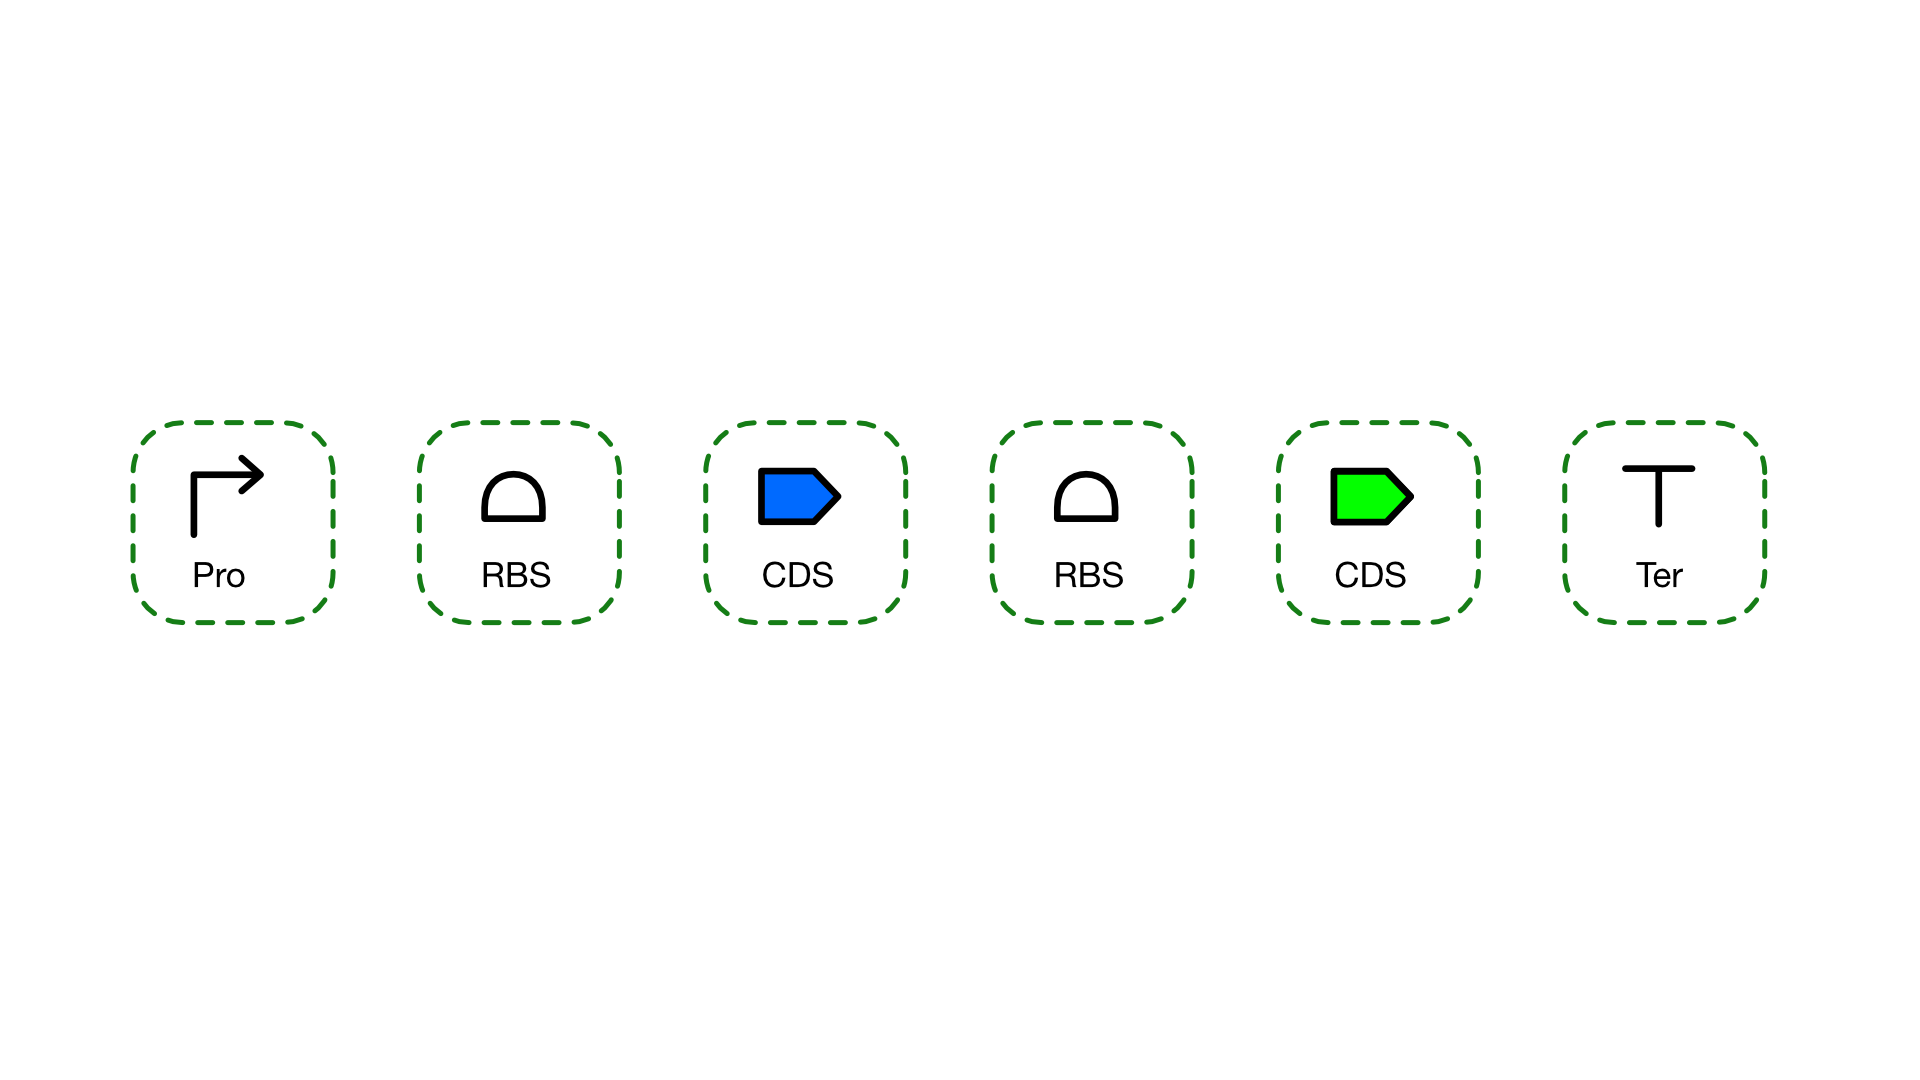

In [9]:
pTet, pTet_seq = component.promoter('pTet', pTet_str, description='Sequence for pTet inverting regulator driven by the TetR protein')
rbs2, rbs2_seq = component.rbs('B0064', rbs2_str, description='This is a single bp change from B0034')
lacI, lacI_seq = component.cds('lacI', tetR_str, description='Coding region for the LacI protein with an LVA degradation tail')
rbs3, rbs3_seq = component.rbs('BD14', rbs3_str, description='This is a bicistronic RBS, consisting of a constitutive RBS, followed by a leader sequence that includes the second RBS')
gfp, gfp_seq = component.cds('gfp', gfp_str, description='superfolder GFP gene')
ter2, ter2_seq = component.terminator('L3S2P21', ter_str, description='Strong synthetic transcriptional terminator')

## Use the Promoter, RBS, CDS and Terminator to create a Transcriptional Unit

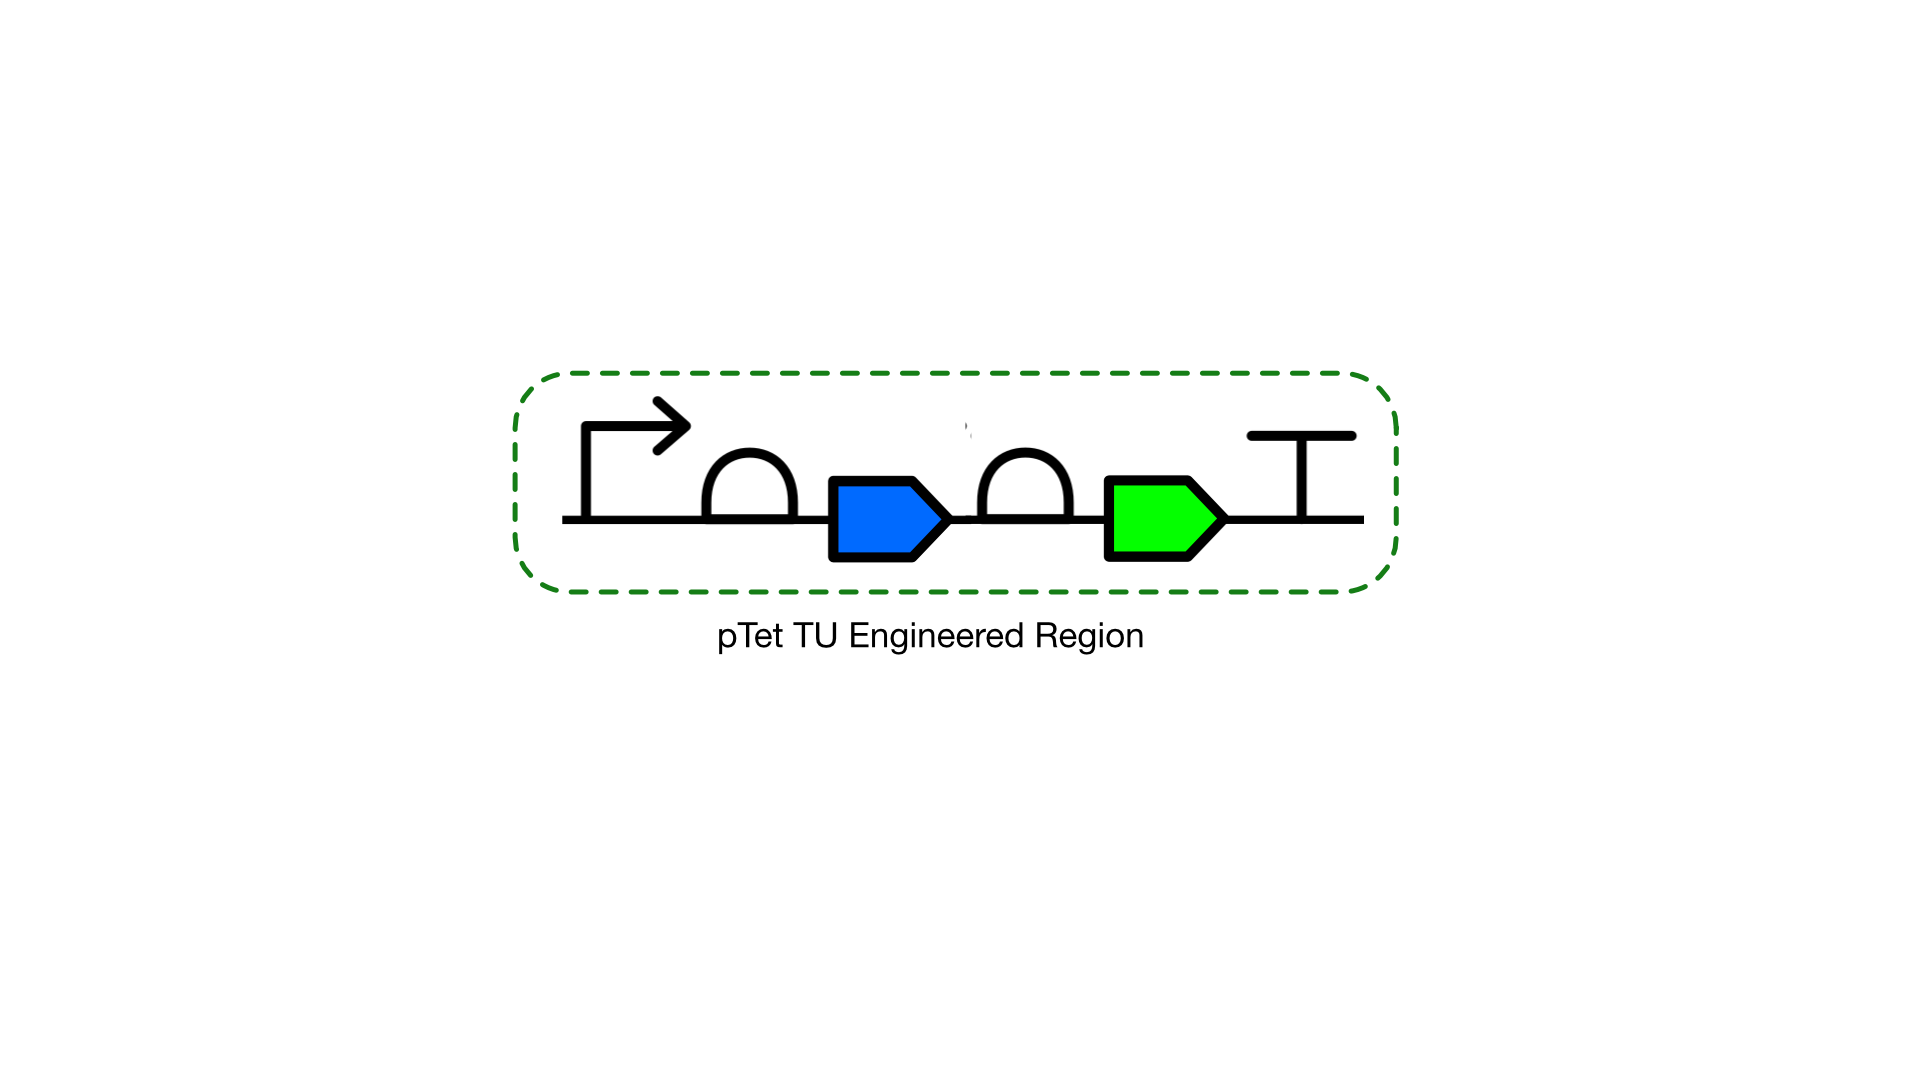

In [10]:
toggle_tu_pTet = component.engineered_region('pTet_tu', [pTet, rbs2, lacI, rbs3, gfp, ter2], description='Transcriptional unit composed of pLac, B0034, tetR and B0015, thus LacI repressible expression and produces TetR.')

doc.add([pTet, pTet_seq, rbs2, rbs2_seq, lacI, lacI_seq, rbs3, rbs3_seq, gfp, gfp_seq, ter2, ter2_seq, toggle_tu_pTet])

In [11]:
for obj in doc.objects:
    print(obj.identity)

https://github.com/Gonza10V/pLac
https://github.com/Gonza10V/pLac_seq
https://github.com/Gonza10V/B0034
https://github.com/Gonza10V/B0034_seq
https://github.com/Gonza10V/tetR
https://github.com/Gonza10V/tetR_seq
https://github.com/Gonza10V/B0015
https://github.com/Gonza10V/B0015_seq
https://github.com/Gonza10V/pLac_tu
https://github.com/Gonza10V/pTet
https://github.com/Gonza10V/pTet_seq
https://github.com/Gonza10V/B0064
https://github.com/Gonza10V/B0064_seq
https://github.com/Gonza10V/lacI
https://github.com/Gonza10V/lacI_seq
https://github.com/Gonza10V/BD14
https://github.com/Gonza10V/BD14_seq
https://github.com/Gonza10V/gfp
https://github.com/Gonza10V/gfp_seq
https://github.com/Gonza10V/L3S2P21
https://github.com/Gonza10V/L3S2P21_seq
https://github.com/Gonza10V/pTet_tu


# Proteins, Chemicals and Complexes in SBOL

Lets create SBOL Components fo the proteins and components on the Toggle switch.

There are 2 ways for creating proteins with a sequence or with an URL.

Aminoacid sequence obtained using DNA sequece and translating it in " https://www.bioinformatics.org/sms2/translate.html

## Create proteins using an aminoacid sequence

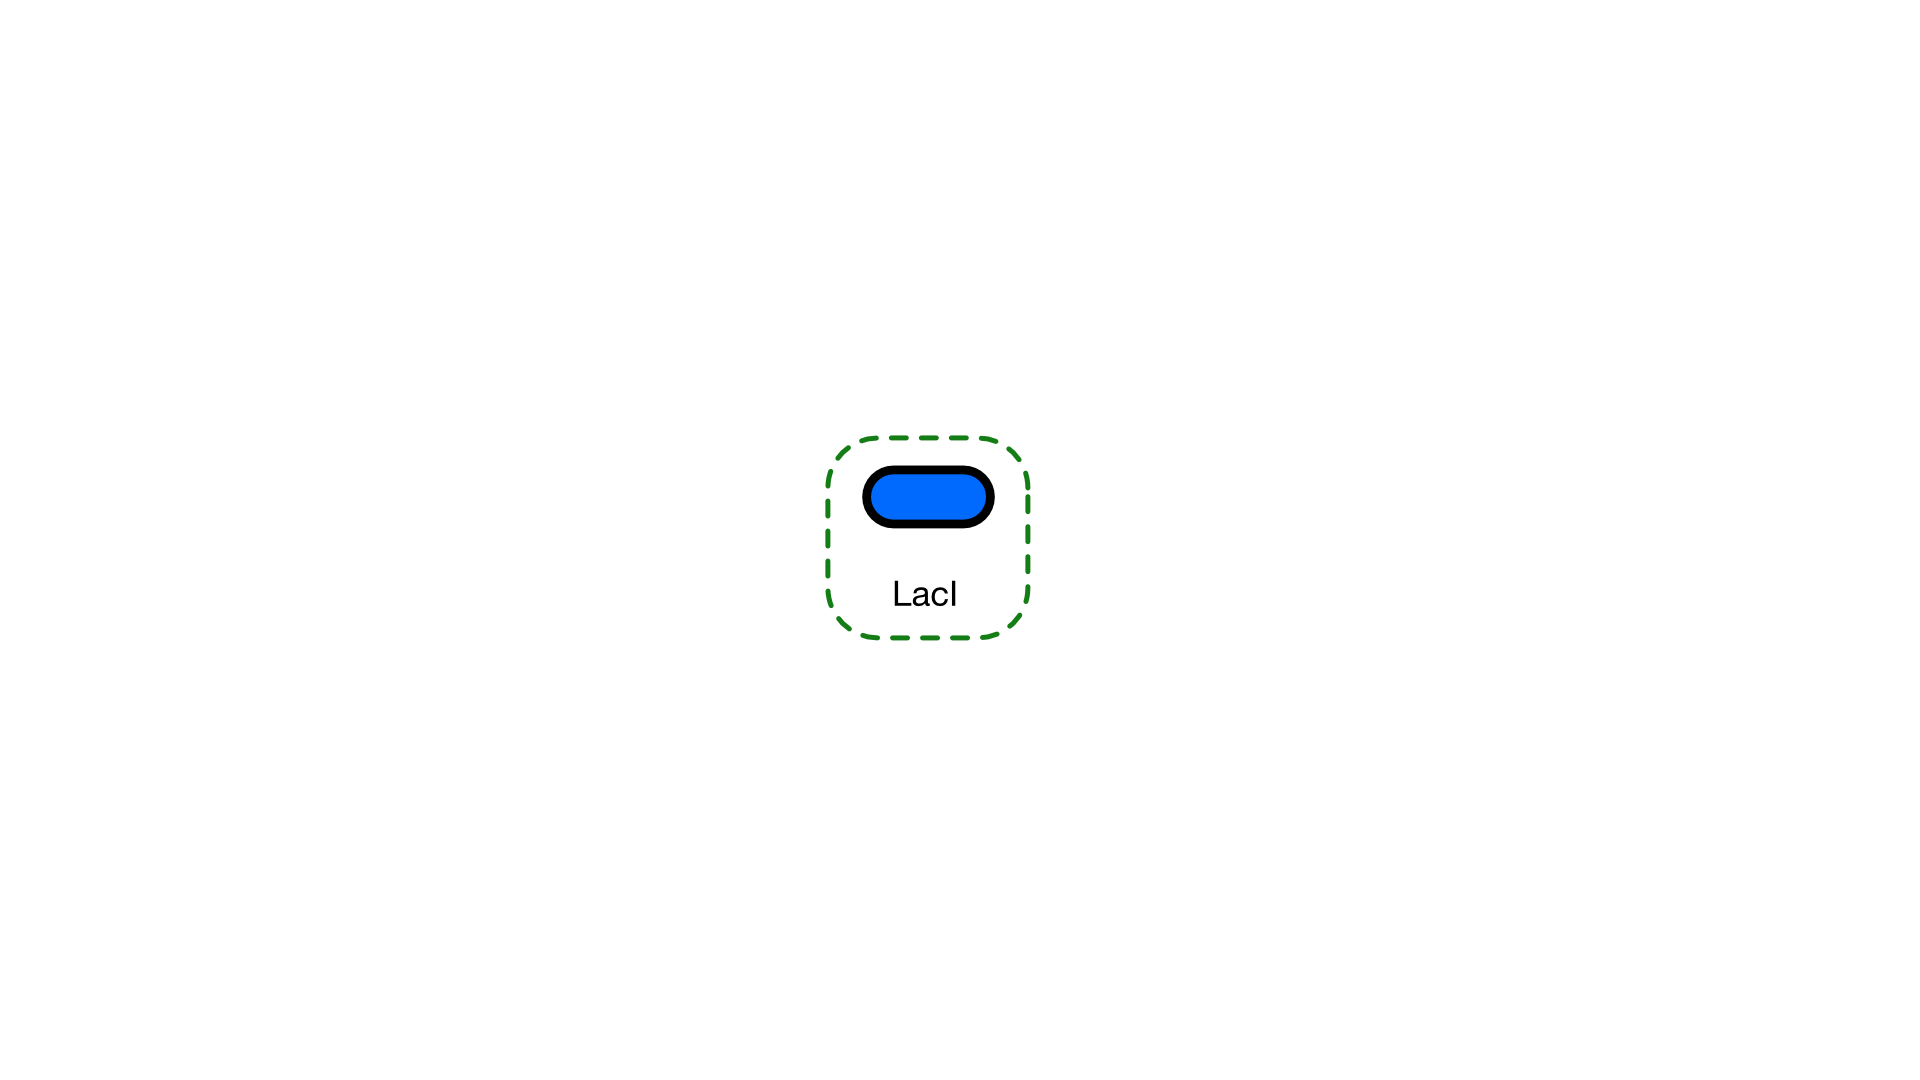

In [12]:
LacI_str = 'MVNVKPVTLYDVAEYAGVSYQTVSRVVNQASHVSAKTREKVEAAMAELNYIPNRVAQQLAGKQSLLIGVATSSLALHAPSQIVAAIKSRADQLGASVVVSMVERSGVEACKAAVHNLLAQRVSGLIINYPLDDQDAIAVEAACTNVPALFLDVSDQTPINSIIFSHEDGTRLGVEHLVALGHQQIALLAGPLSSVSARLRLAGWHKYLTRNQIQPIAEREGDWSAMSGFQQTMQMLNEGIVPTAMLVANDQMALGAMRAITESGLRVGADISVVGYDDTEDSSCYIPPLTTIKQDFRLLGQTSVDRLLQLSQGQAVKGNQLLPVSLVKRKTTLAPNTQTASPRALADSLMQLARQVSRLESGQAANDENYALVA**L**C*CRS'


In [13]:
LacI, LacI_seq = component.transcription_factor('LacI', LacI_str, description='Protein for LacI directly translated from the lacI CDS')


## Create externally defined proteins using URLs

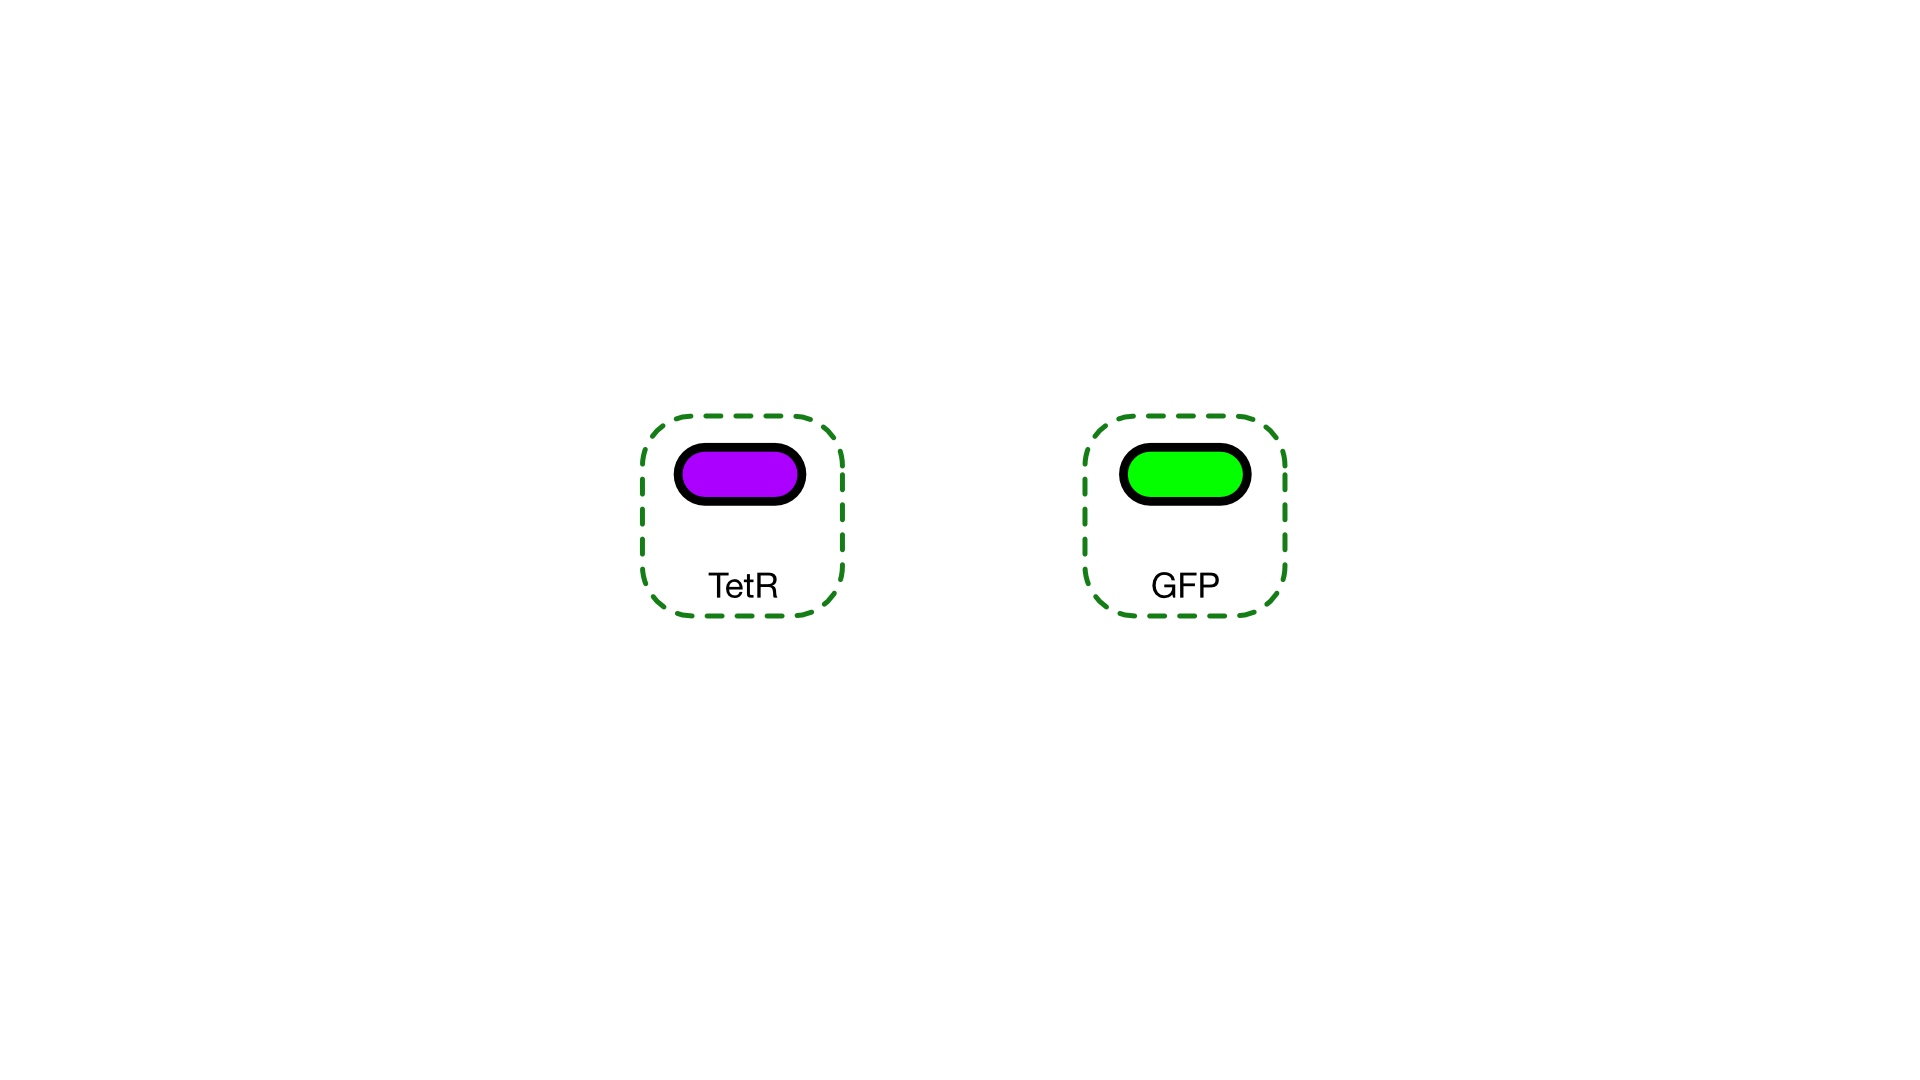

In [14]:
TetR_url = 'https://www.ncbi.nlm.nih.gov/protein/CAP07772.1'
GFP_url = 'https://www.fpbase.org/protein/superfolder-gfp/'

In [15]:
TetR = component.ed_protein(definition=TetR_url, description='TetR protein from NCBI')
GFP = component.ed_protein(definition=GFP_url, description='GFP protein from FPbase')

## Create externally defined chemicals using URLs

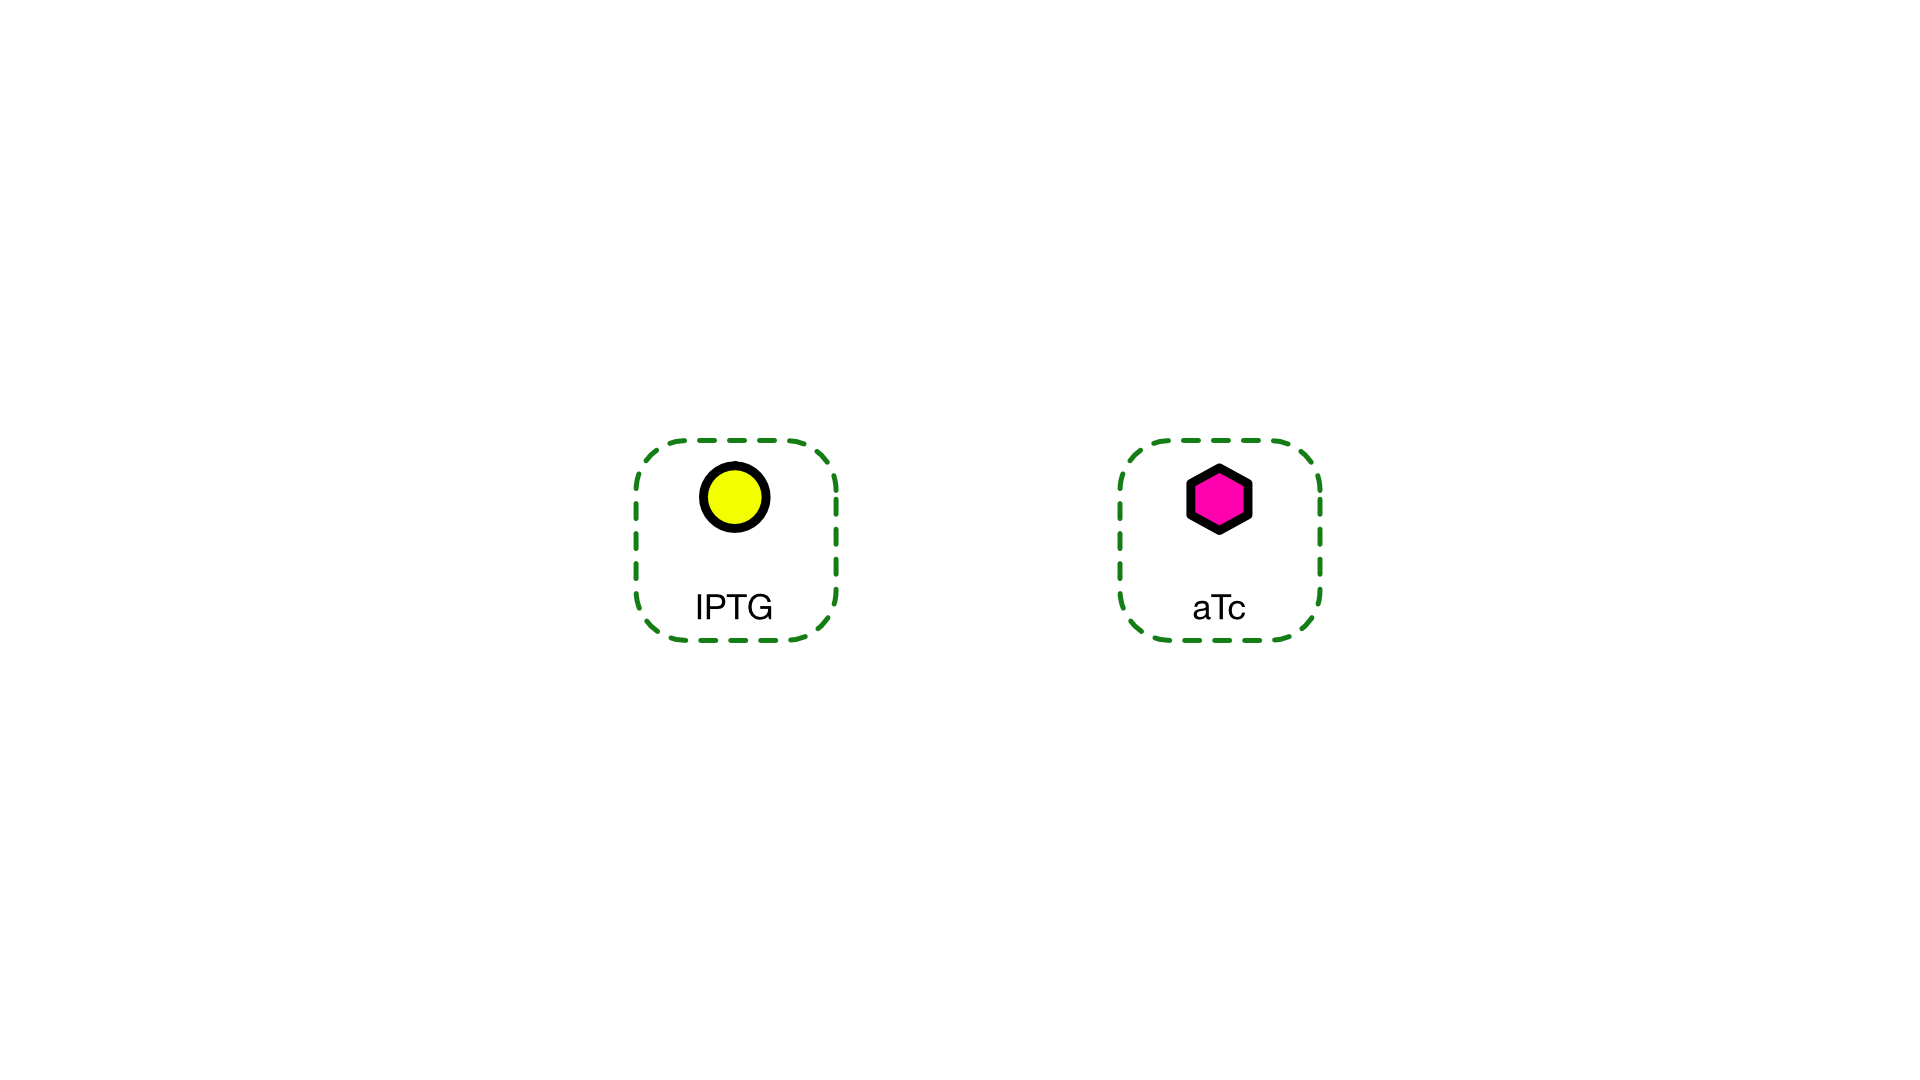

In [16]:
IPTG_url = 'https://pubchem.ncbi.nlm.nih.gov/compound/656894'
aTc_url = 'https://pubchem.ncbi.nlm.nih.gov/compound/54675758'

In [17]:
IPTG = component.ed_simple_chemical(definition=IPTG_url, description='IPTG compound from pubchem')
aTc = component.ed_simple_chemical(definition=aTc_url, description='aTc compound from pubchem')

## Create complex components

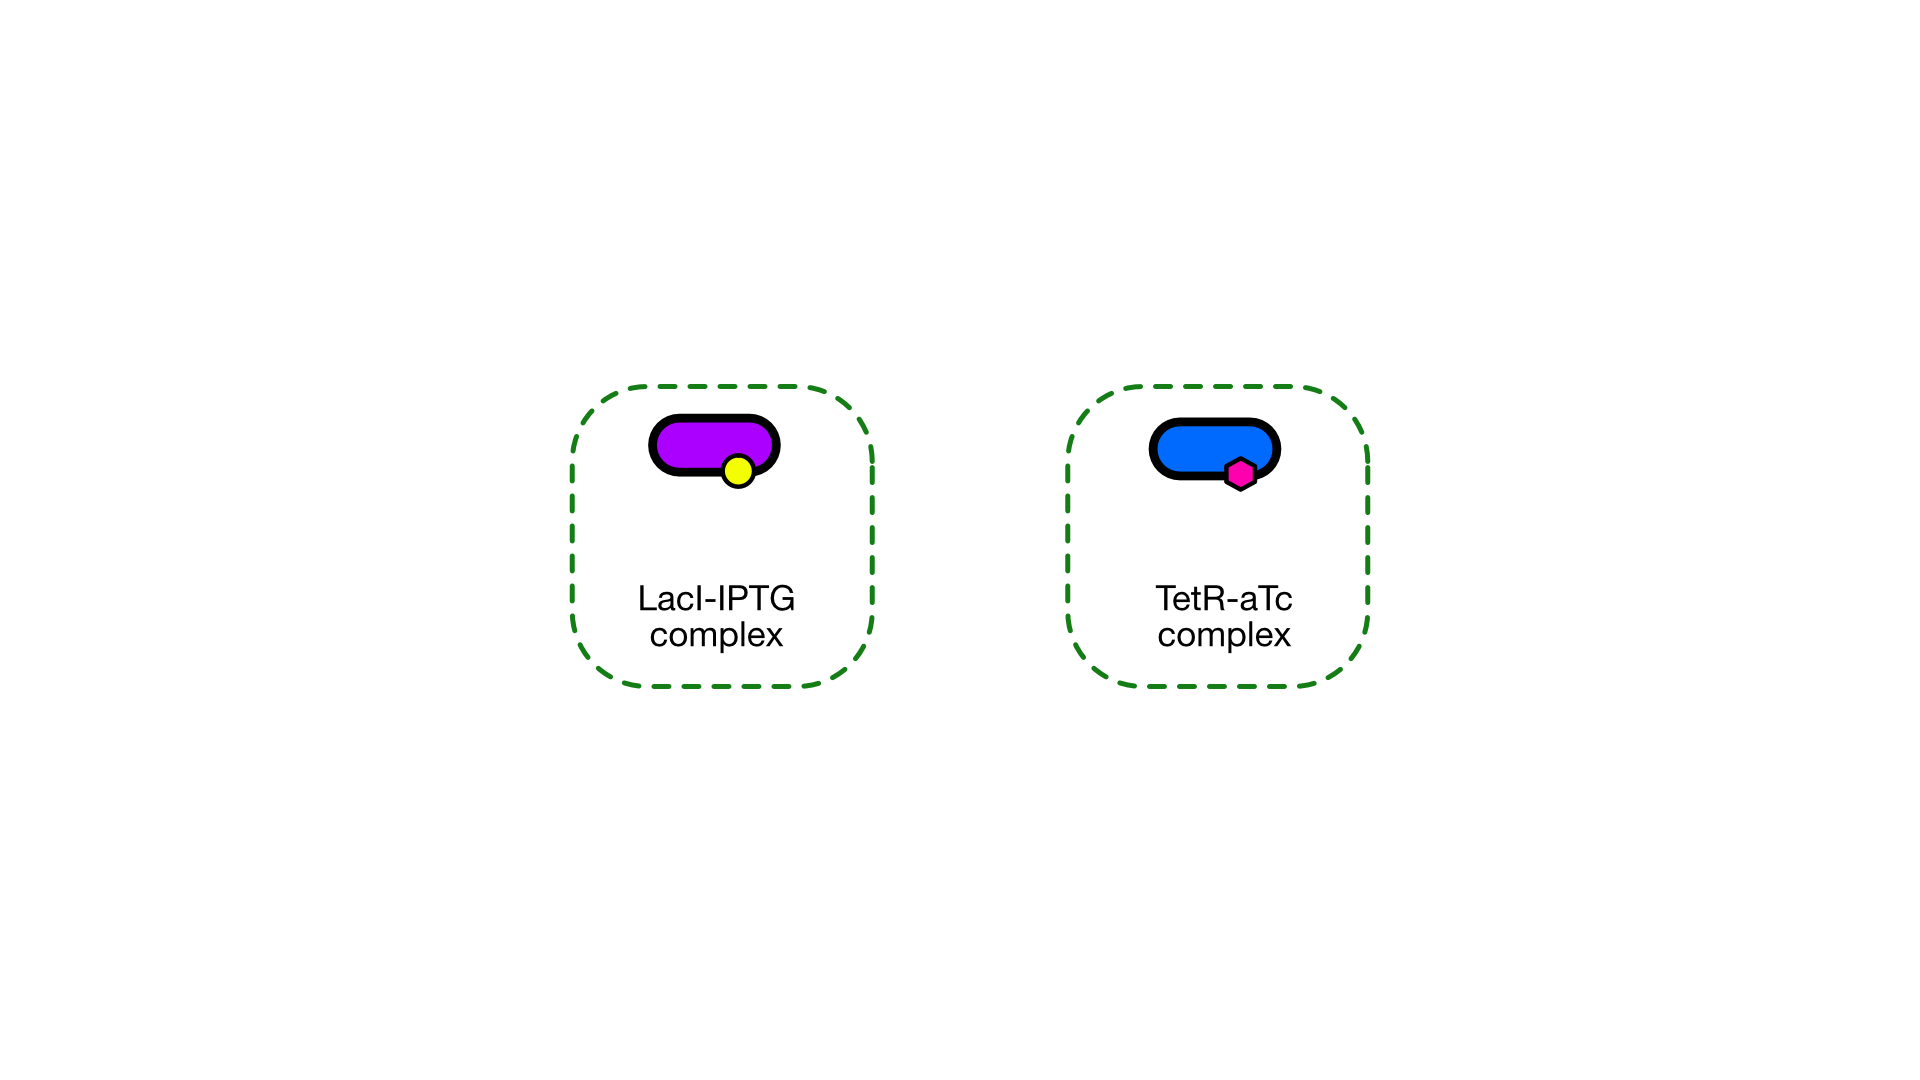

In [18]:
LacI_IPTG_complex = sbol3.Component(identity='LacI_IPTG_complex', types=sbol3.SBO_NON_COVALENT_COMPLEX)
TetR_aTc_complex = sbol3.Component(identity='TetR_aTc_complex', types=sbol3.SBO_NON_COVALENT_COMPLEX)

add all the components to the Document

In [19]:
doc.add([LacI, LacI_seq, LacI_IPTG_complex, TetR_aTc_complex])

## Create a system and add parts

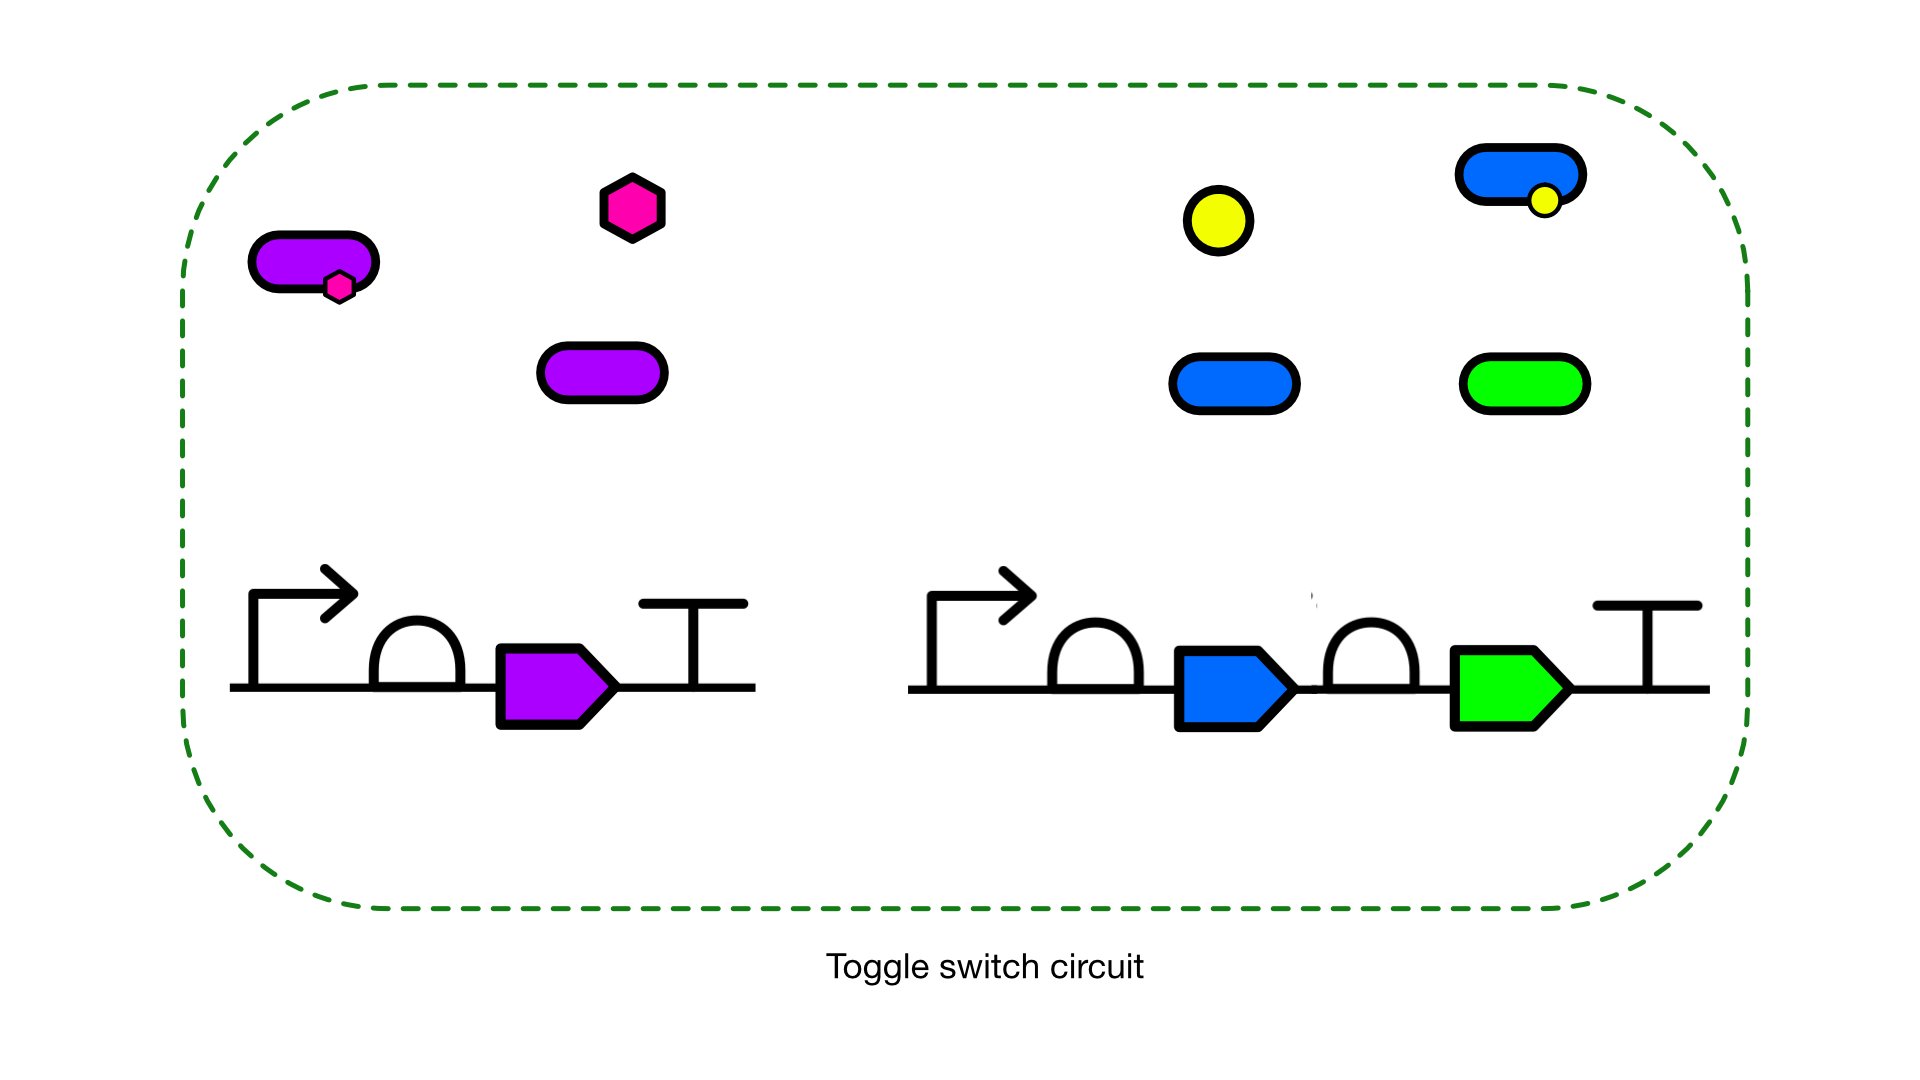

## Create interactions between parts

In [20]:
# create a Component for the device
toggle_switch_circuit = sbol3.Component(identity='IWBDA_toggle_switch' ,types=sbol3.SBO_FUNCTIONAL_ENTITY, roles=tyto.NCIT.system)

# define SubComponents
pLac_tu_subcomponent = sbol3.SubComponent(toggle_tu_pLac)
pTet_tu_subcomponent = sbol3.SubComponent(toggle_tu_pTet)
LacI_protein_subcomponent = sbol3.SubComponent(LacI)
LacI_IPTG_complex_subcomponent = sbol3.SubComponent(LacI_IPTG_complex)
LacI_TetR_complex_subcomponent = sbol3.SubComponent(TetR_aTc_complex)

toggle_switch_circuit.features.append(pLac_tu_subcomponent)
toggle_switch_circuit.features.append(pTet_tu_subcomponent)
toggle_switch_circuit.features.append(LacI_protein_subcomponent)
toggle_switch_circuit.features.append(TetR)
toggle_switch_circuit.features.append(GFP)
toggle_switch_circuit.features.append(IPTG)
toggle_switch_circuit.features.append(aTc)
toggle_switch_circuit.features.append(LacI_IPTG_complex_subcomponent)
toggle_switch_circuit.features.append(LacI_TetR_complex_subcomponent)

### pLac TU produces TetR

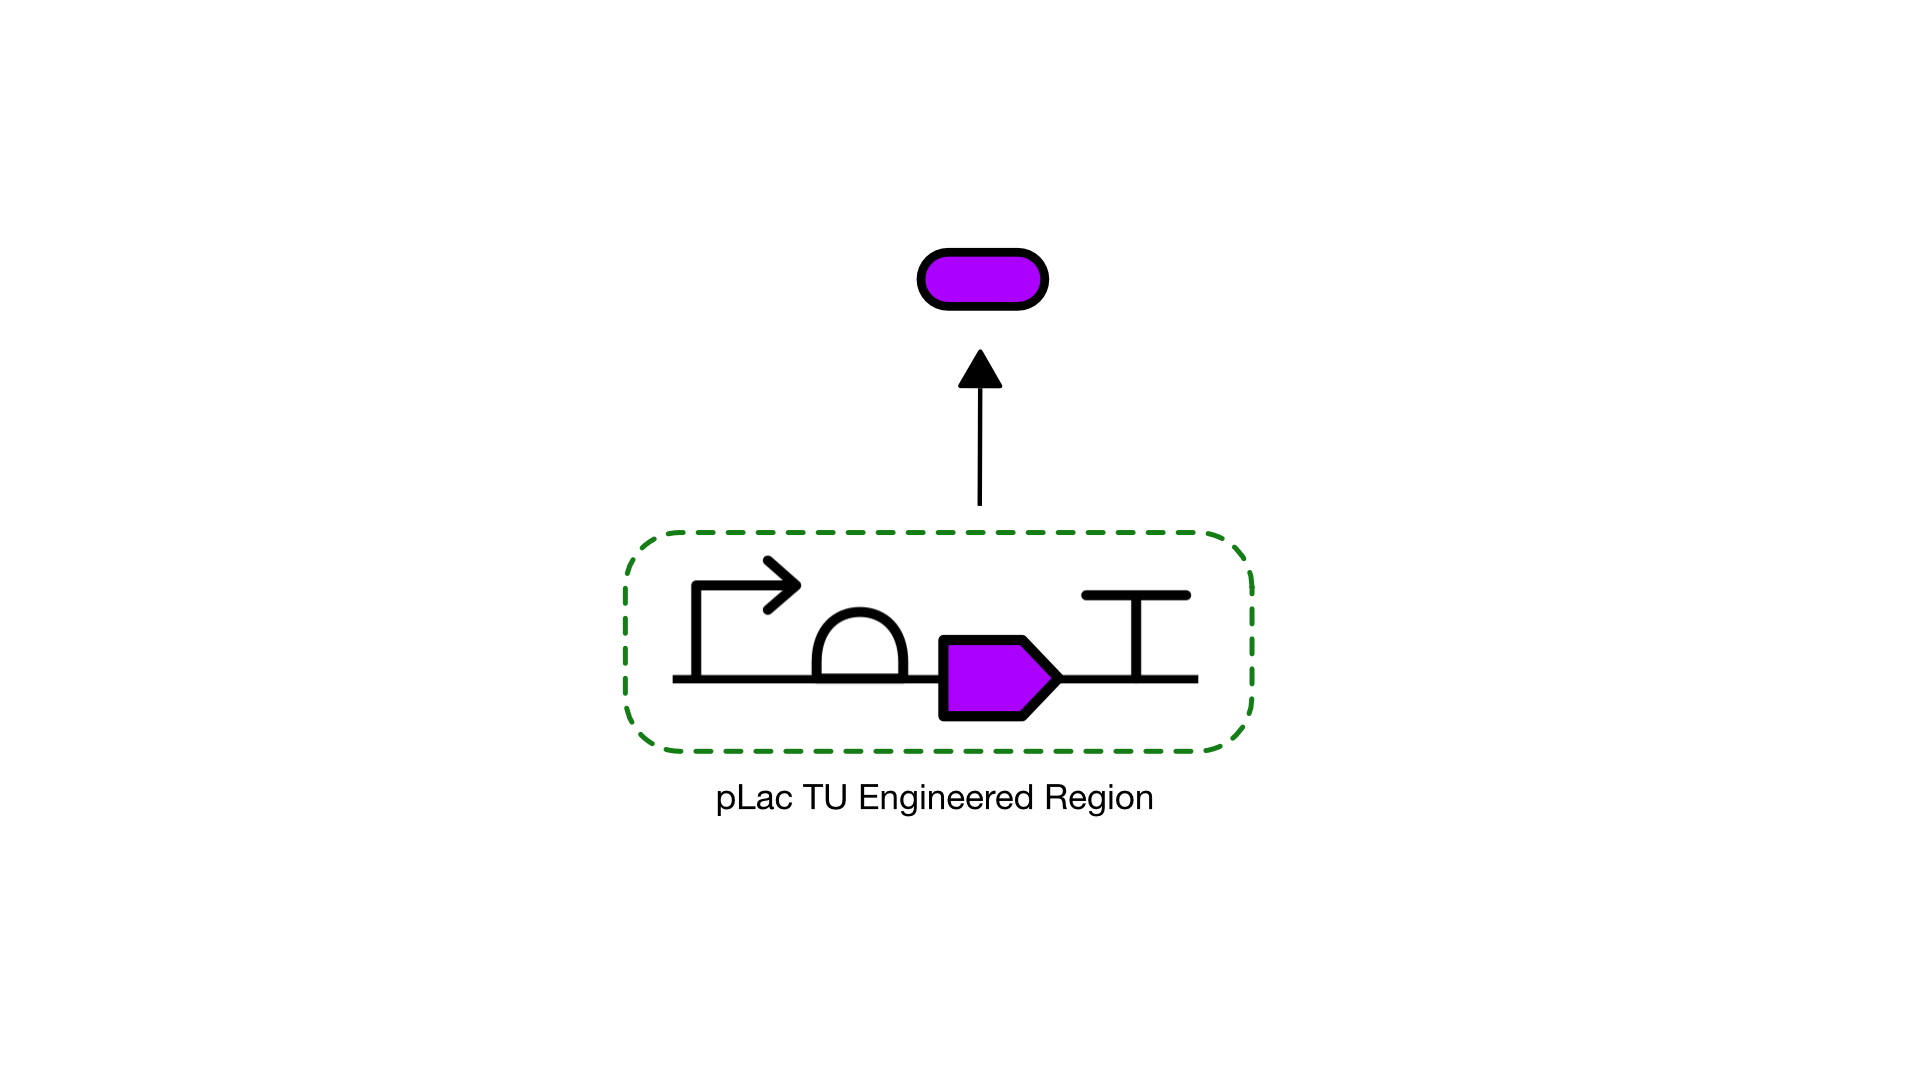

In [21]:
pLac_tu_participation = sbol3.Participation(roles=[sbol3.SBO_TEMPLATE], participant=pLac_tu_subcomponent)
TetR_protein_participation = sbol3.Participation(roles=[sbol3.SBO_PRODUCT], participant=TetR)
TetR_genetic_production = sbol3.Interaction(types=[sbol3.SBO_GENETIC_PRODUCTION], participations=[pLac_tu_participation, TetR_protein_participation])

toggle_switch_circuit.interactions.append(TetR_genetic_production)

### pTet TU produces LacI

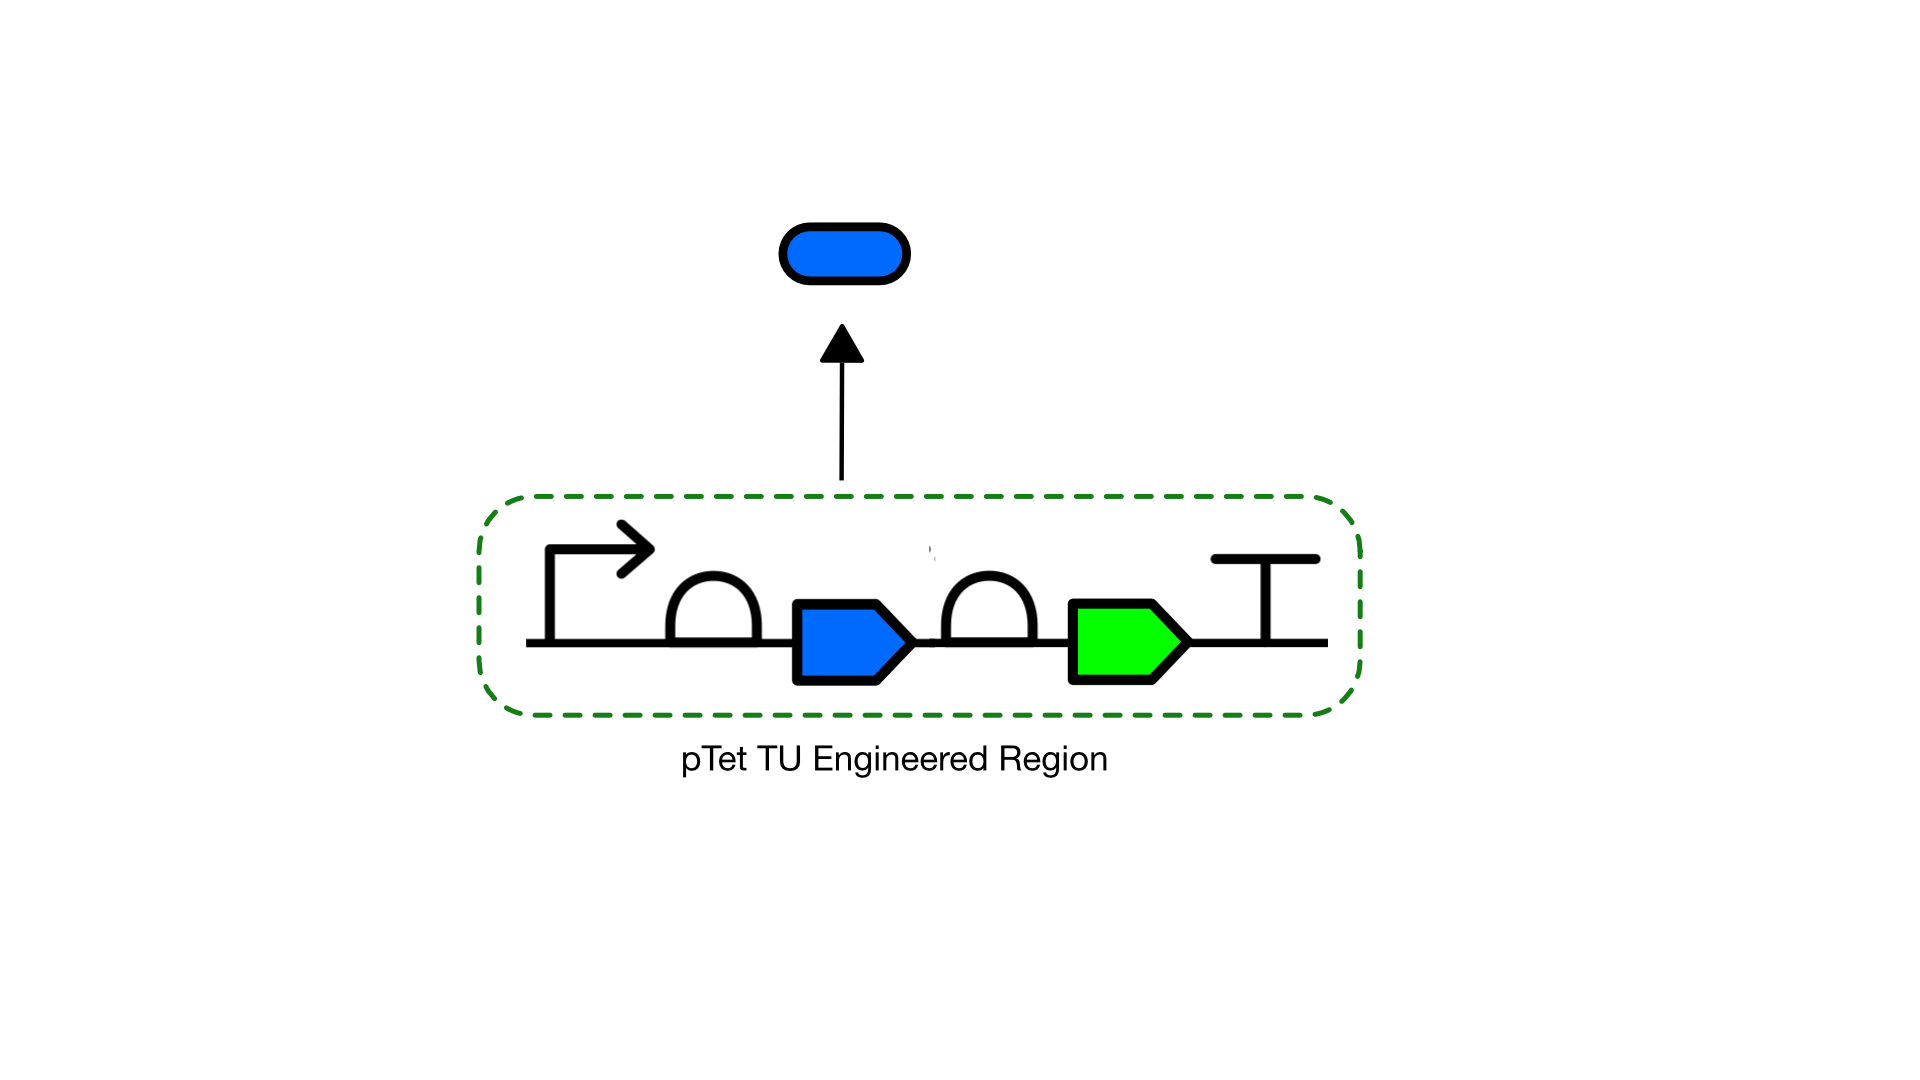

In [22]:
pTet_tu_participation = sbol3.Participation(roles=[sbol3.SBO_TEMPLATE], participant=pTet_tu_subcomponent)
LacI_protein_participation = sbol3.Participation(roles=[sbol3.SBO_PRODUCT], participant=LacI_protein_subcomponent)
LacI_genetic_production = sbol3.Interaction(types=[sbol3.SBO_GENETIC_PRODUCTION], participations=[pTet_tu_participation, LacI_protein_participation])

toggle_switch_circuit.interactions.append(LacI_genetic_production)


### pTet TU produces GFP

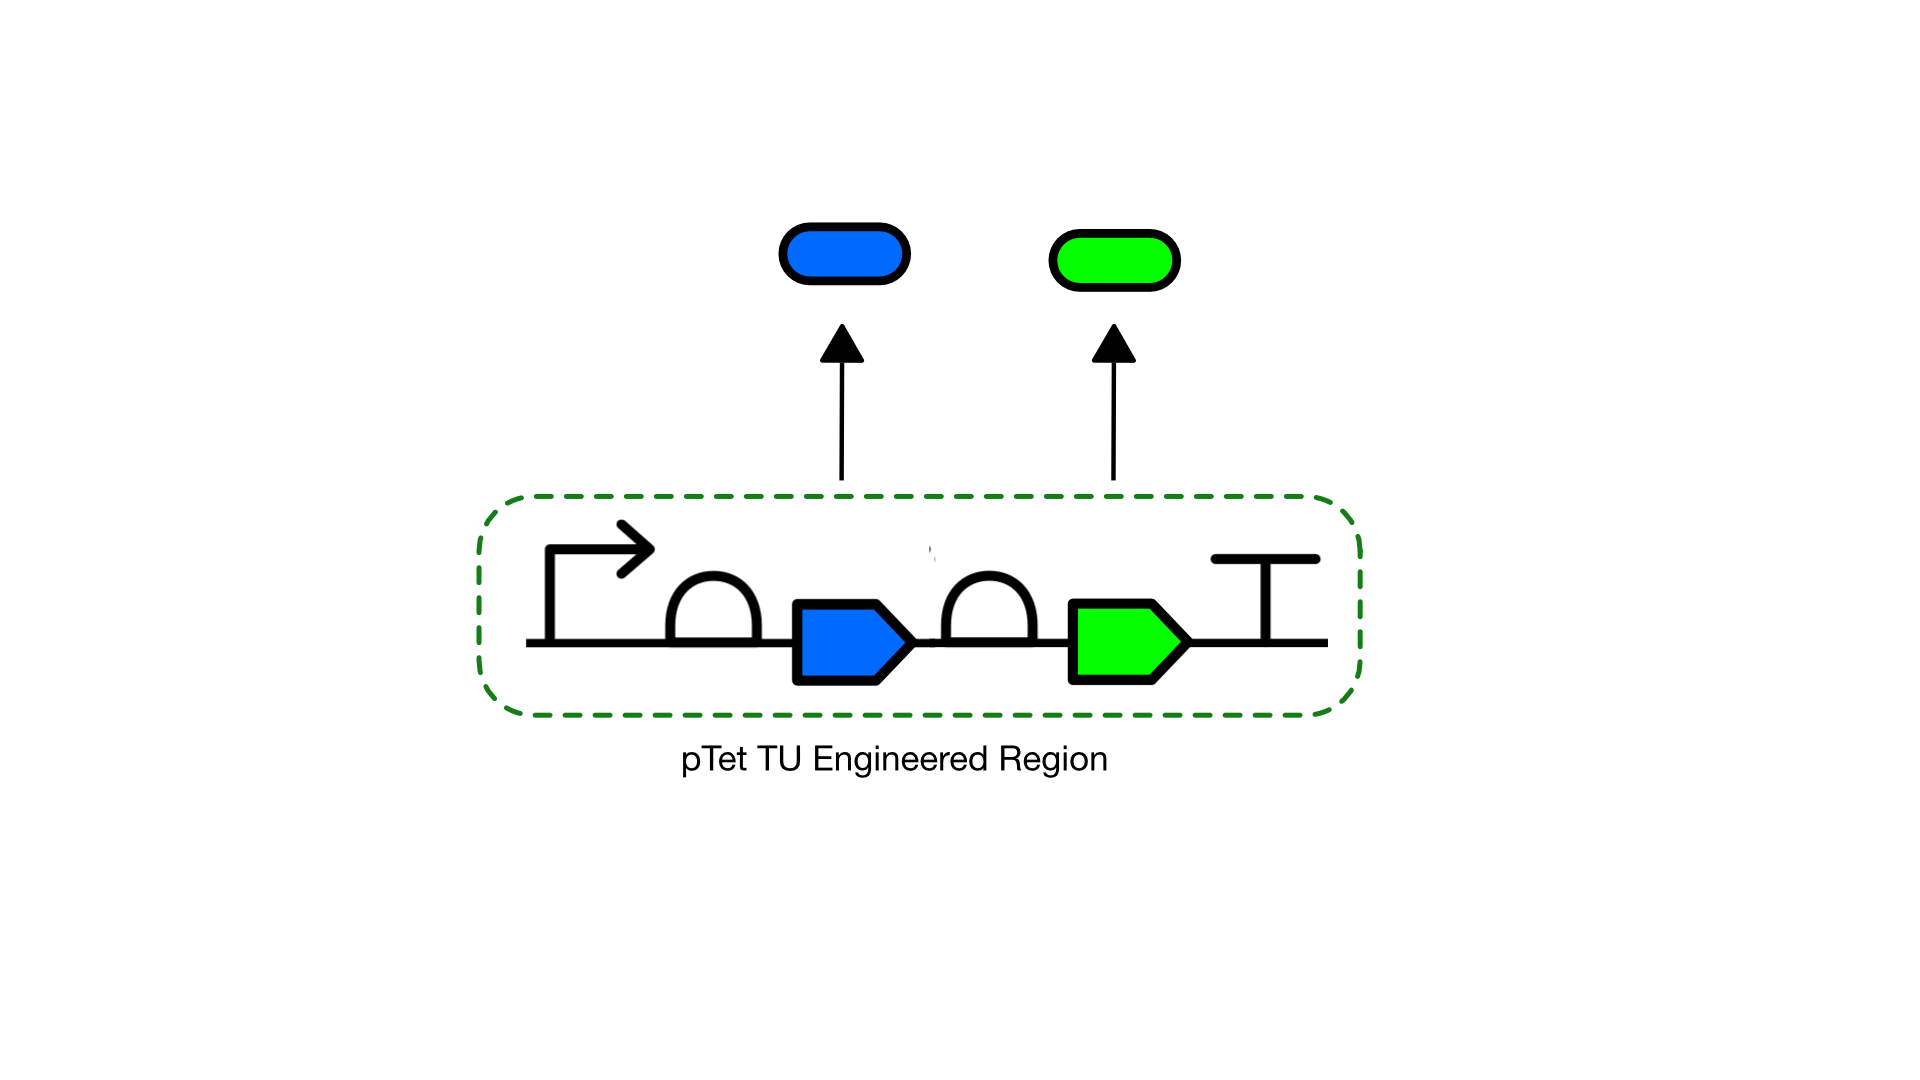

In [23]:
pTet_tu_participation = sbol3.Participation(roles=[sbol3.SBO_TEMPLATE], participant=pTet_tu_subcomponent)
GFP_protein_participation = sbol3.Participation(roles=[sbol3.SBO_PRODUCT], participant=GFP)
GFP_genetic_production = sbol3.Interaction(types=[sbol3.SBO_GENETIC_PRODUCTION], participations=[pTet_tu_participation, GFP_protein_participation])

toggle_switch_circuit.interactions.append(GFP_genetic_production)

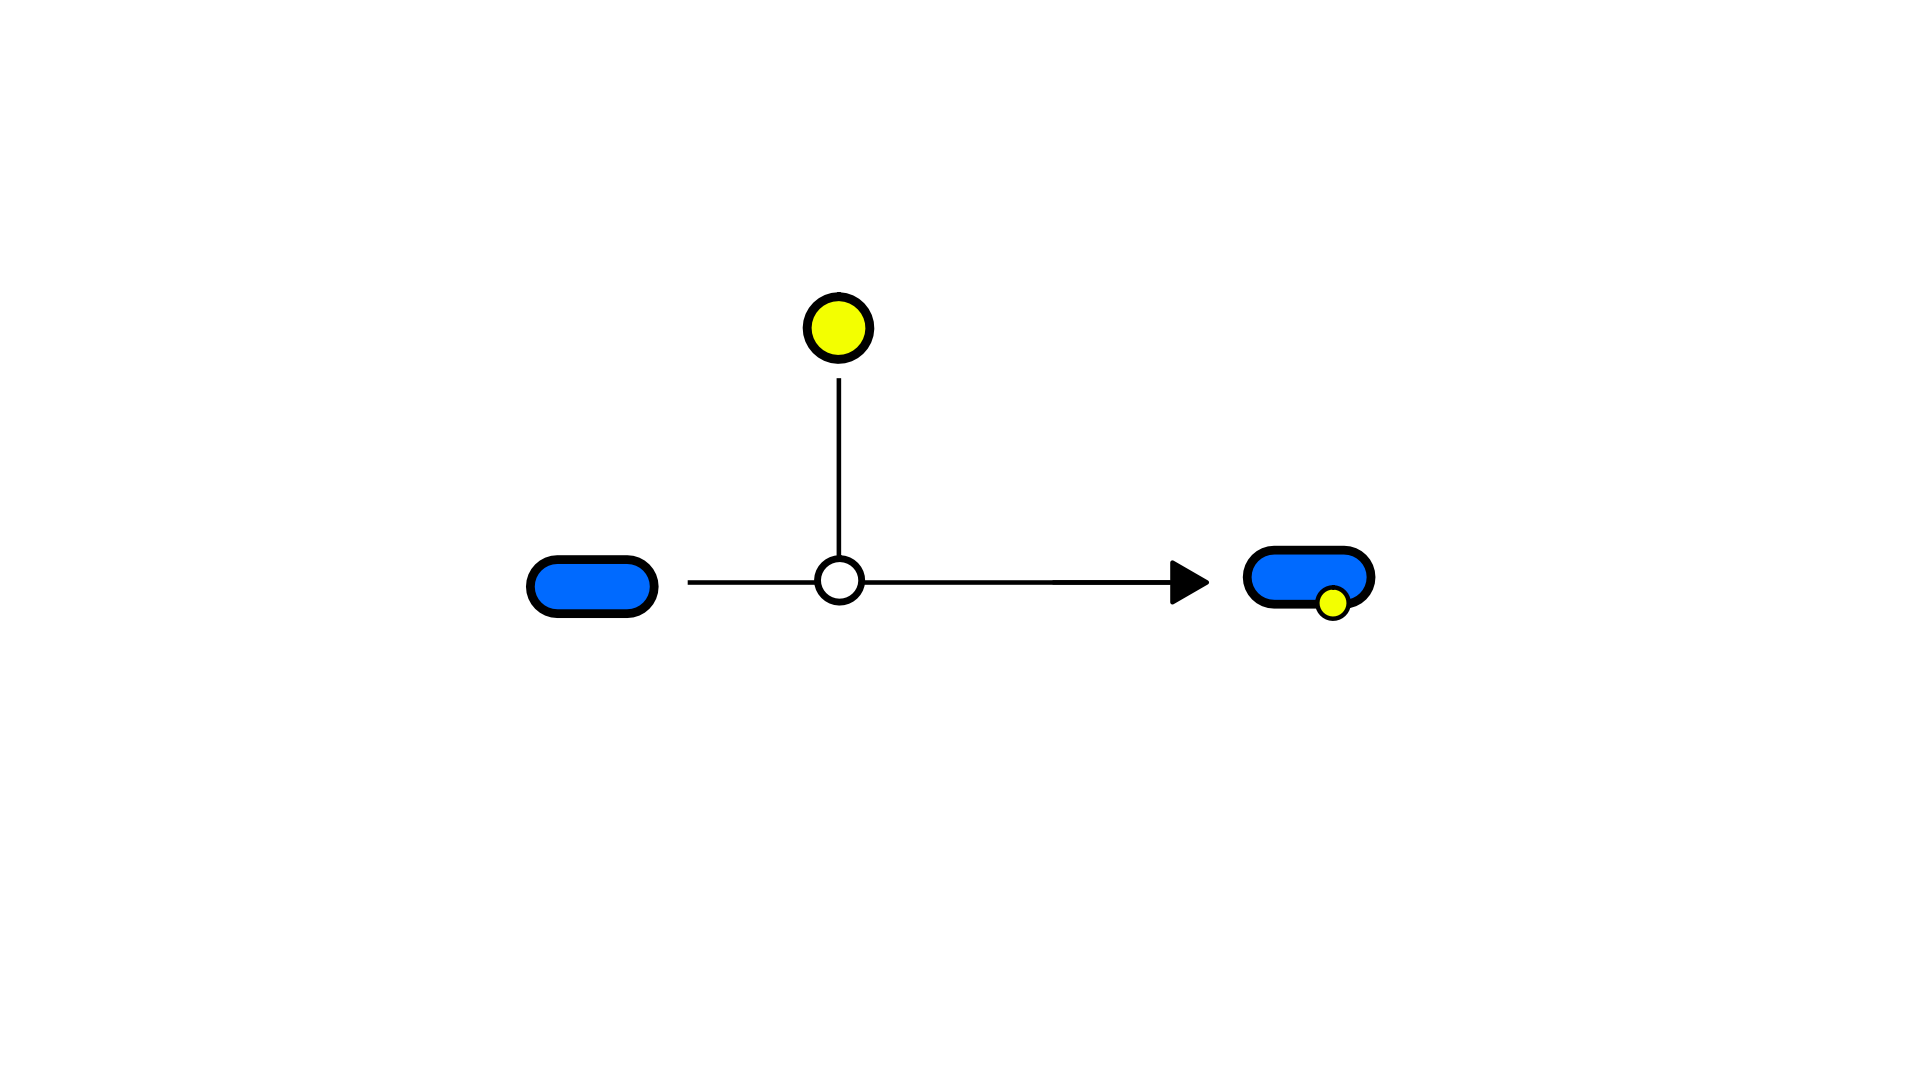

In [24]:
# IPTG forms a complex with LacI
IPTG_participation = sbol3.Participation(roles=[sbol3.SBO_REACTANT], participant=IPTG)
LacI_participation = sbol3.Participation(roles=[sbol3.SBO_REACTANT], participant=LacI_protein_subcomponent)
complex_LacI_IPTG_participation = sbol3.Participation(roles=[sbol3.SBO_PRODUCT], participant=LacI_IPTG_complex_subcomponent)
complex_LacI_IPTG_formation = sbol3.Interaction(types=[sbol3.SBO_NON_COVALENT_BINDING], participations=[IPTG_participation, LacI_participation, complex_LacI_IPTG_participation])

toggle_switch_circuit.interactions.append(complex_LacI_IPTG_formation)


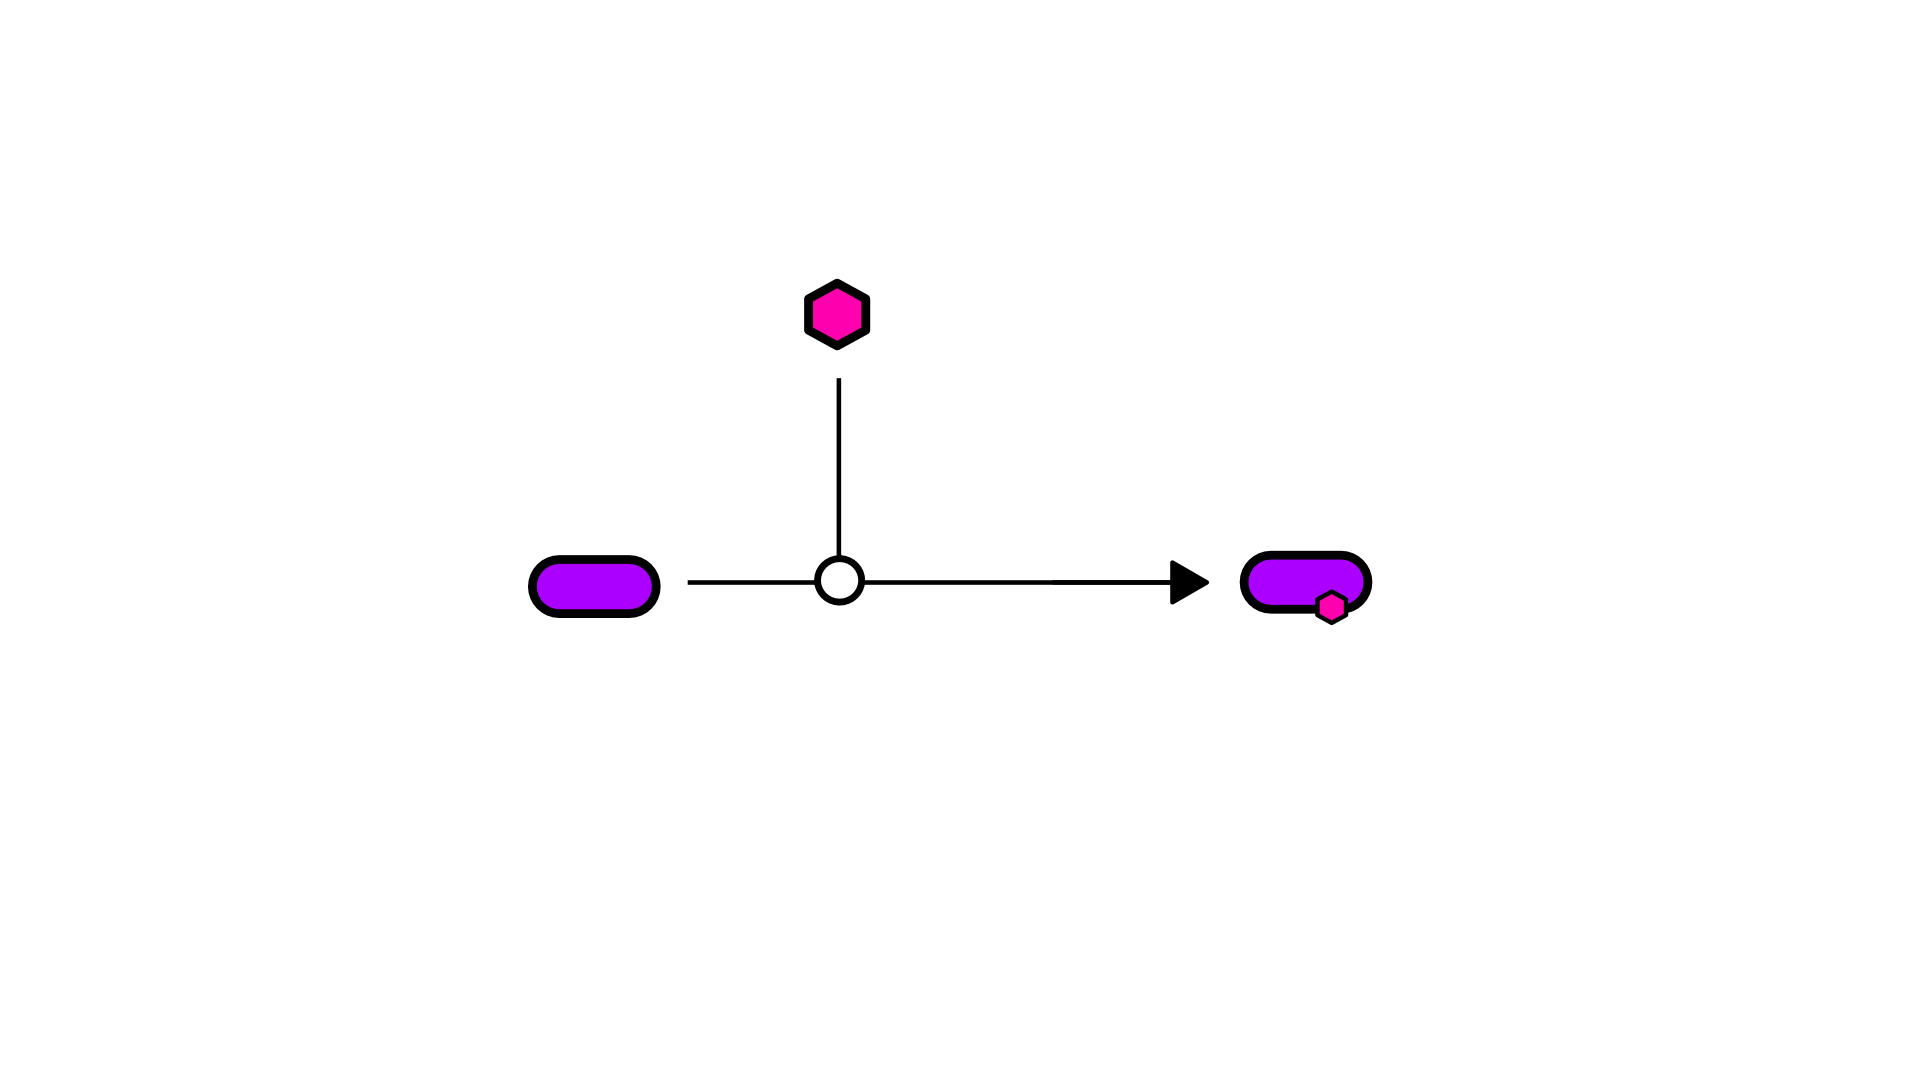

In [25]:
# aTc forms a complex with TetR
aTc_participation = sbol3.Participation(roles=[sbol3.SBO_REACTANT], participant=aTc)
TetR_participation = sbol3.Participation(roles=[sbol3.SBO_REACTANT], participant=TetR)
complex_TetR_aTc_participation = sbol3.Participation(roles=[sbol3.SBO_PRODUCT], participant=LacI_TetR_complex_subcomponent)
complex_TetR_aTc_formation = sbol3.Interaction(types=[sbol3.SBO_NON_COVALENT_BINDING], participations=[aTc_participation, TetR_participation, complex_TetR_aTc_participation])

toggle_switch_circuit.interactions.append(complex_TetR_aTc_formation)

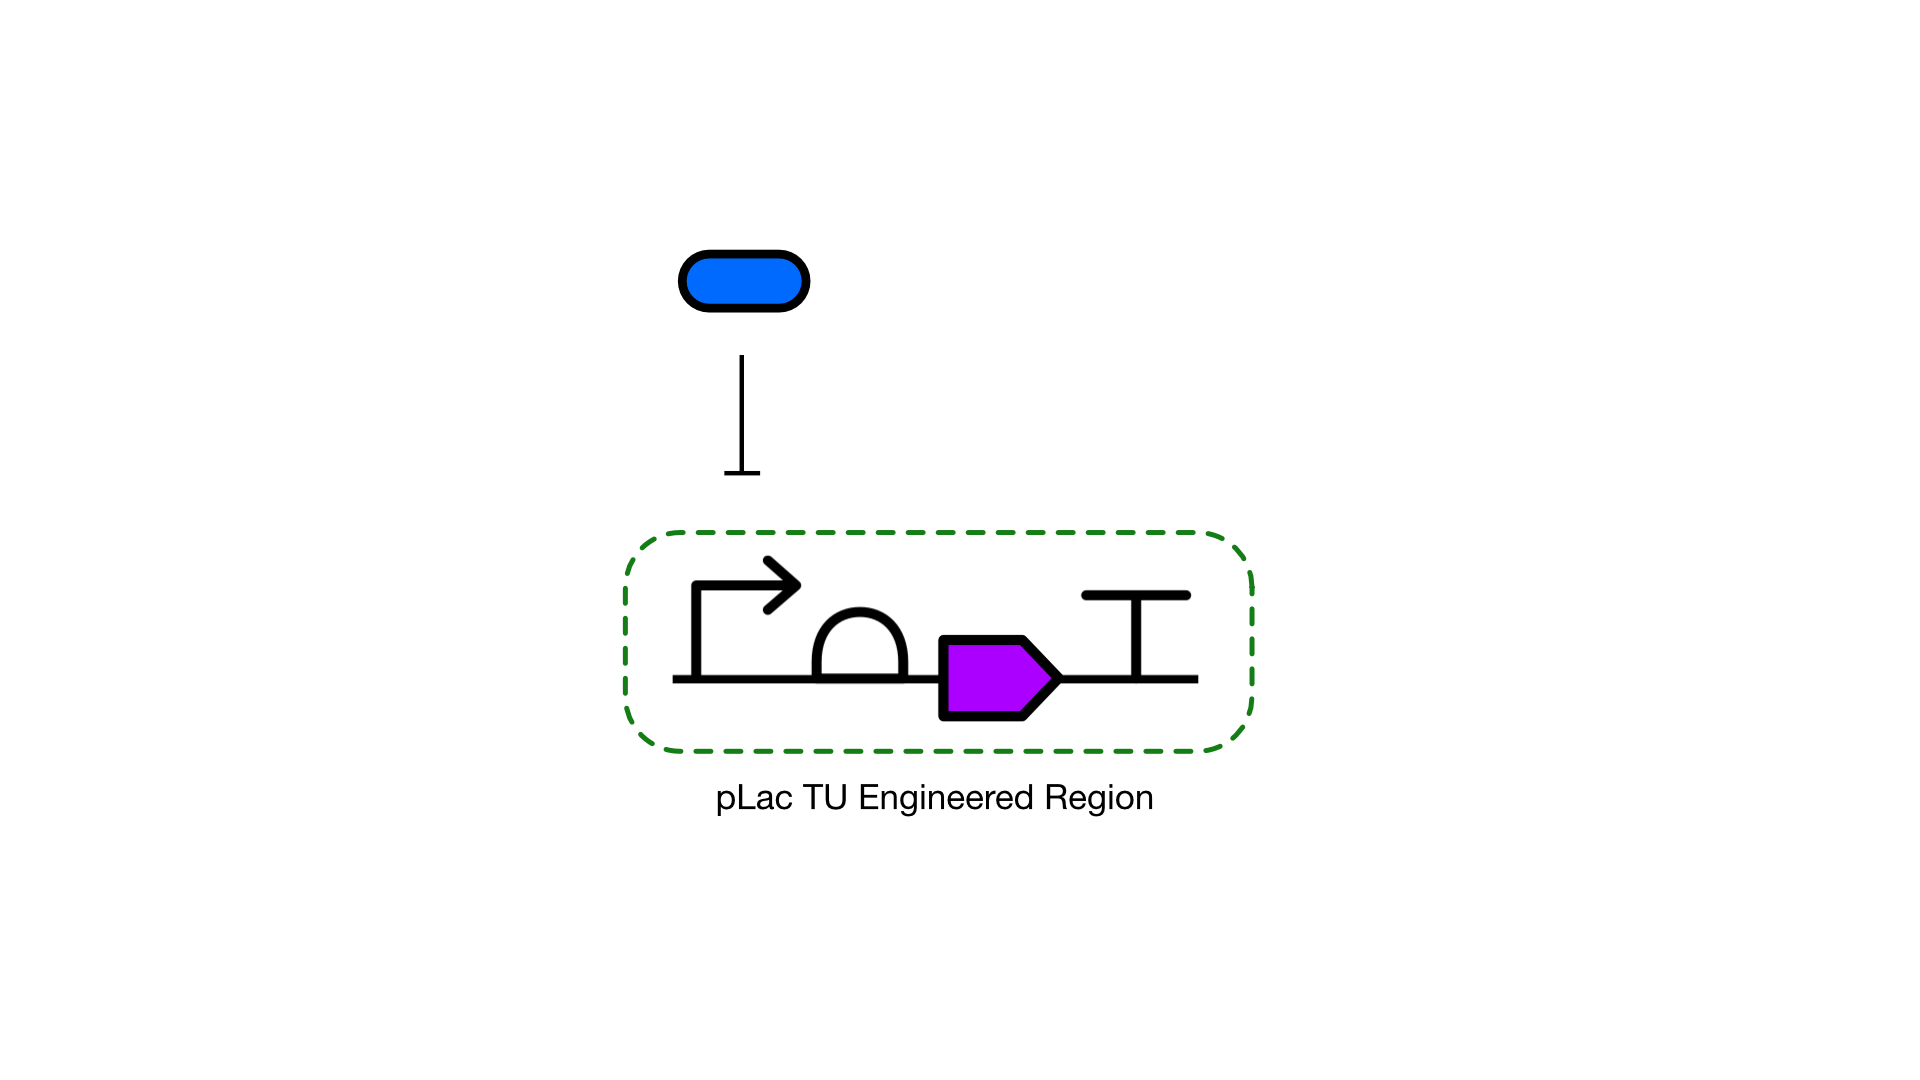

In [28]:
# LacI represses pLac TU
LacI_inhibitor = sbol3.Participation(roles=[sbol3.SBO_INHIBITOR], participant=LacI_protein_subcomponent)
pLac_tu_inhibited = sbol3.Participation(roles=[sbol3.SBO_INHIBITED], participant=pLac_tu_subcomponent)
LacI_pLac_inhibition = sbol3.Interaction(types=[sbol3.SBO_INHIBITION], participations=[LacI_inhibitor, pLac_tu_inhibited])

toggle_switch_circuit.interactions.append(LacI_pLac_inhibition)

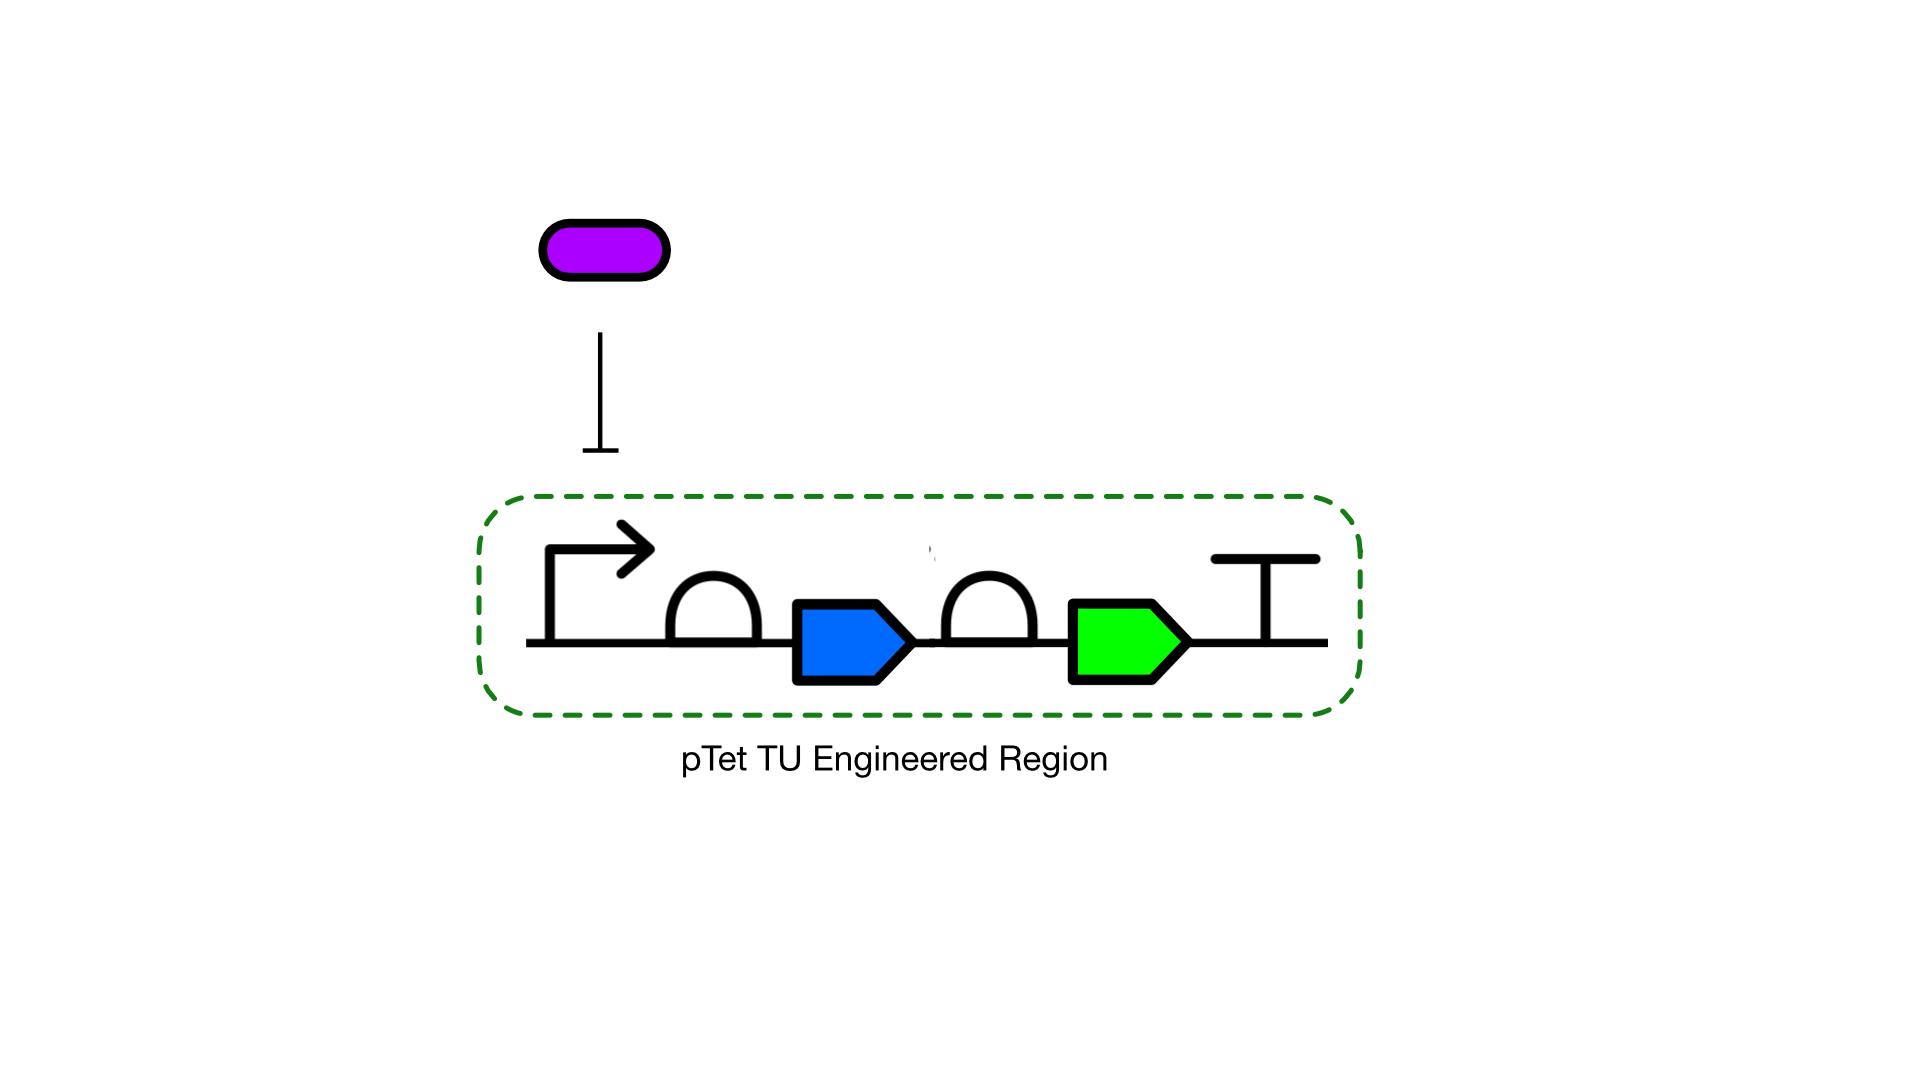

In [30]:
# TetR represses pTet TU
TetR_inhibitor = sbol3.Participation(roles=[sbol3.SBO_INHIBITOR], participant=TetR)
pTet_tu_inhibited = sbol3.Participation(roles=[sbol3.SBO_INHIBITED], participant=pTet_tu_subcomponent)
TetR_pTet_inhibition = sbol3.Interaction(types=[sbol3.SBO_INHIBITION], participations=[TetR_inhibitor, pTet_tu_inhibited])

toggle_switch_circuit.interactions.append(TetR_pTet_inhibition)

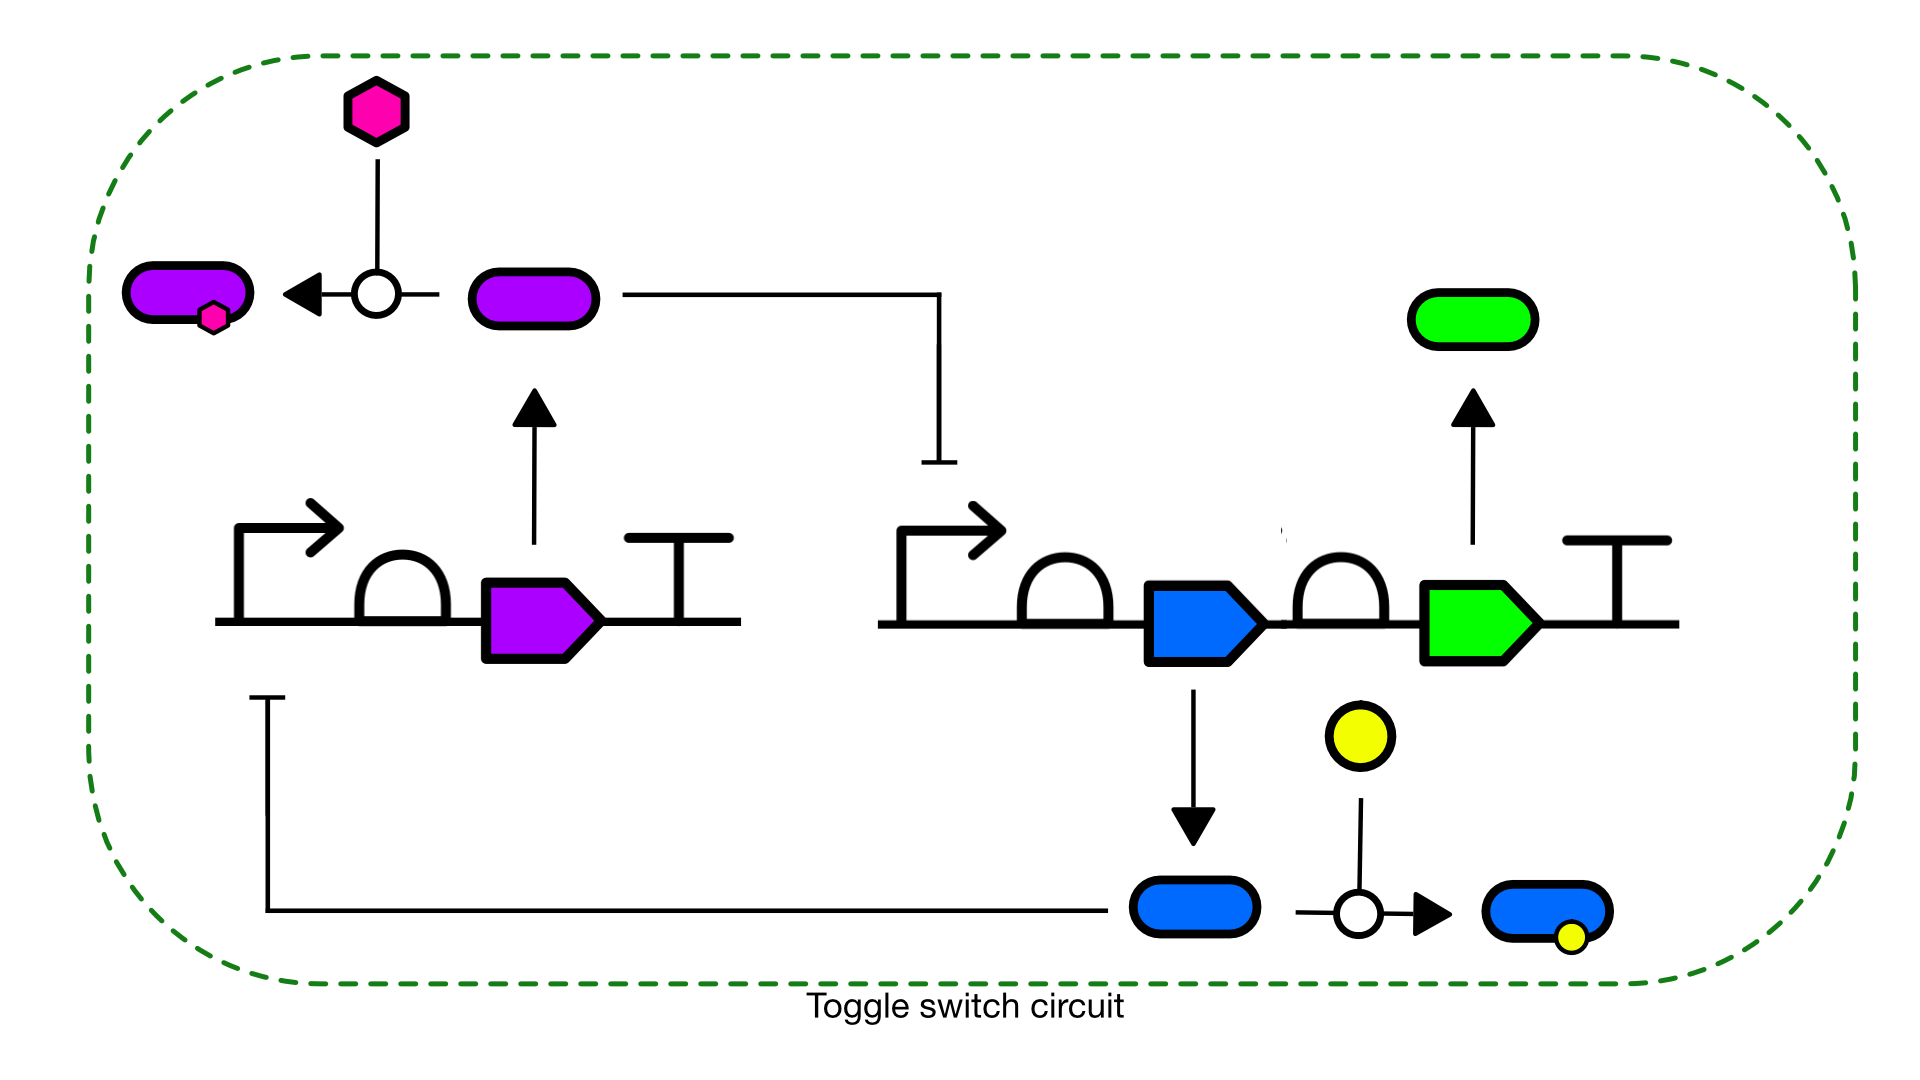

In [31]:
doc.add(toggle_switch_circuit)

In [ ]:
bacterial_host = component.strain('E. coli')
circuit_sc = sbol3.SubComponent(toggle_switch_circuit)

bacterial_host.features.append(bacterial_host)

doc.add(bacterial_host)

In [32]:
for obj in doc.objects:
    print(obj.identity)

https://github.com/Gonza10V/pLac
https://github.com/Gonza10V/pLac_seq
https://github.com/Gonza10V/B0034
https://github.com/Gonza10V/B0034_seq
https://github.com/Gonza10V/tetR
https://github.com/Gonza10V/tetR_seq
https://github.com/Gonza10V/B0015
https://github.com/Gonza10V/B0015_seq
https://github.com/Gonza10V/pLac_tu
https://github.com/Gonza10V/pTet
https://github.com/Gonza10V/pTet_seq
https://github.com/Gonza10V/B0064
https://github.com/Gonza10V/B0064_seq
https://github.com/Gonza10V/lacI
https://github.com/Gonza10V/lacI_seq
https://github.com/Gonza10V/BD14
https://github.com/Gonza10V/BD14_seq
https://github.com/Gonza10V/gfp
https://github.com/Gonza10V/gfp_seq
https://github.com/Gonza10V/L3S2P21
https://github.com/Gonza10V/L3S2P21_seq
https://github.com/Gonza10V/pTet_tu
https://github.com/Gonza10V/LacI
https://github.com/Gonza10V/LacI_seq
https://github.com/Gonza10V/LacI_IPTG_complex
https://github.com/Gonza10V/TetR_aTc_complex
https://github.com/Gonza10V/IWBDA_toggle_switch


In [33]:
doc.write('iwbda24_toggle_switch.xml')

# Self work

## Create your own TU expressing GFP

Define your sequences: Search the web looking for DNA sequences for a Promoter, RBS, CDS and Terminator.

Some good places to start are:

https://synbiohub.org/

https://parts.igem.org/Main_Page

https://www.ncbi.nlm.nih.gov/genbank/

Paste the sequences into its respective string,

In [ ]:
pro_str = ''
rbs_str = ''
...

Create components

In [ ]:
pro, pro_seq = component.promoter(identity='Promoter1', sequence=pro_str , description='Example promoter')
...

Create a transcriptional unit

Create a protein (related to your CDS)

Create a Component for the system and then add the TU ans protein as features

You did it! Great job!